# Exploration of Training Histories and Evaluation Metrics



Labels which were used in training and the number of each label in the whole mentioned database are as follows (numbers can be found [here](https://github.com/physionetchallenges/evaluation-2021/blob/main/dx_mapping_scored.csv)):

| DX | SNOMED CT Code | CPSC |CPSC_Extra|StPetersburg |PTB|PTB_XL | Georgia |Chapman_Shaoxing |Ningbo |Total |
|----|----------------|-------|----|---|-------|----|---|-------|----|---|
|sinus rhythm|426783006|918 |4 |0 |	80 |18092 |	1752 |1826 |6299 |28971 |
|sinus bradycardia|426177001| 0 |45 |0 |0 |637 |1677 |3889 |12670 |18918|
|t wave abnormal|164934002|0 |22|0 |0 |2345 |2306|1876| 5167|11716|
|sinus tachycardia|427084000|0 |303 |11| 1 |826 |1261 |1568 |5687 |9657 |
|atrial flutter|164890007|0 |54 |0 |1 |	73 |186 |445 |7615 |8374 |	
|left axis deviation|39732003|0 |0 |0 |	0 |	5146 |	940 |382 |1163 |	7631|
|atrial fibrillation|164889003|1221 |153|2 |15 	|1514 |	570 |1780 |	0 |	5255|
|t wave inversion|59931005|0 |5 |1 |0 |	294 |812 |157 |	2720 |3989|
|sinus arrhythmia|427393009|0 |	11 |2 |	0 |	772 |455 |	0 |	2550 |	3790|
|1st degree av block|270492004|722 |106 |0 |0 |	797 |769 |	247 |893 |	3534|

Detailed description about the dataset is available in the notebook [Exploration of the PhysioNet2021 Data](exploration_physionet2021_data.ipynb).

<br>
<br>

## Models trained with stratified splitted data <a class="anchor" id="trained-stratified"></a>

5 different CSV test files were made in total and they are described as follows:

|file name | source | No. of ECGs |
|:----------:|:--------:|:-------------:|
|`test_split0.csv` | CPSC and CPSC-Extra databases | 3 546 |
|`test_split1.csv`| Chapman-Shaoxin and Ningbo databases| 43 637|
|`test_split2.csv`| PTB and PTBXL databases| 21 236|
|`test_split3.csv`| INCART (St. Petersburg) database| 15|
|`test_split4.csv`| G12EC (Georgia) database| 8 150|

As a reminder, the stratified data split is based on the split descriped in `physionet_stratified.yaml` (found in `/configs/data_splitting/`) and is as follows:

```
splits:
    - split_1:
      train: ['G12EC', 'INCART', 'PTB_PTBXL', 'ChapmanShaoxing_Ningbo']
      test: 'CPSC_CPSC-Extra'
    - split_2:
      train: ['G12EC', 'INCART', 'PTB_PTBXL', 'CPSC_CPSC-Extra']
      test: 'ChapmanShaoxing_Ningbo'
    - split_3:
      train: ['G12EC', 'INCART', 'CPSC_CPSC-Extra', 'ChapmanShaoxing_Ningbo']
      test: 'PTB_PTBXL'
    - split_4:
      train: ['G12EC', 'PTB_PTBXL', 'CPSC_CPSC-Extra', 'ChapmanShaoxing_Ningbo']
      test: 'INCART'
    - split_5:
      train: ['INCART', 'PTB_PTBXL', 'CPSC_CPSC-Extra', 'ChapmanShaoxing_Ningbo']
      test: 'G12EC'
```

So all the models which names start with `split0_` used `test_split0.csv` to make predictions. Similarly, all the models which names start with `split1_` used `test_split1.csv` to make predictions and so on.


## Models trained with database-wise splitted data <a class="anchor" id="trained-dbwise"></a>

As a reminder, there are all together 20 different train-val-test splits based on the database-wise splitted data. The different combinations are as follows:

```

1) CPSC_CPSC-Extra.csv for test data

train: PTB_PTBXL.csv, INCART.csv, G12EC.csv
val: ChapmanShaoxing_Ningbo.csv
test: CPSC_CPSC-Extra.csv

train: PTB_PTBXL.csv, INCART.csv, ChapmanShaoxing_Ningbo.csv
val: G12EC.csv
test: CPSC_CPSC-Extra.csv

train: PTB_PTBXL.csv, ChapmanShaoxing_Ningbo.csv, G12EC.csv
val: INCART.csv
test: CPSC_CPSC-Extra.csv

train: INCART.csv, ChapmanShaoxing_Ningbo.csv, G12EC.csv
val: PTB_PTBXL.csv, 
test: CPSC_CPSC-Extra.csv

2) ChapmanShaoxing_Ningbo.csv for test data

train: PTB_PTBXL.csv, INCART.csv, G12EC.csv
val: CPSC_CPSC-Extra.csv
test: ChapmanShaoxing_Ningbo.csv

train: PTB_PTBXL.csv, INCART.csv, CPSC_CPSC-Extra.csv
val: G12EC.csv
test: ChapmanShaoxing_Ningbo.csv

train: PTB_PTBXL.csv, CPSC_CPSC-Extra.csv, G12EC.csv
val: INCART.csv
test: ChapmanShaoxing_Ningbo.csv

train: INCART.csv, CPSC_CPSC-Extra.csv, G12EC.csv
val: PTB_PTBXL.csv, 
test: ChapmanShaoxing_Ningbo.csv

3) PTB_PTBXL.csv for test data

train: ChapmanShaoxing_Ningbo.csv, INCART.csv, G12EC.csv
val: CPSC_CPSC-Extra.csv
test: PTB_PTBXL.csv

train: ChapmanShaoxing_Ningbo.csv, INCART.csv, CPSC_CPSC-Extra.csv
val: G12EC.csv
test: PTB_PTBXL.csv

train: ChapmanShaoxing_Ningbo.csv, CPSC_CPSC-Extra.csv, G12EC.csv
val: INCART.csv
test: PTB_PTBXL.csv

train: INCART.csv, CPSC_CPSC-Extra.csv, G12EC.csv
val: ChapmanShaoxing_Ningbo.csv
test: PTB_PTBXL.csv

4) INCART.csv for test data

train: ChapmanShaoxing_Ningbo.csv, PTB_PTBXL.csv, G12EC.csv
val: CPSC_CPSC-Extra.csv
test: INCART.csv

train: ChapmanShaoxing_Ningbo.csv, PTB_PTBXL.csv, CPSC_CPSC-Extra.csv
val: G12EC.csv
test: INCART.csv

train: ChapmanShaoxing_Ningbo.csv, CPSC_CPSC-Extra.csv, G12EC.csv
val: PTB_PTBXL.csv
test: INCART.csv

train: PTB_PTBXL.csv, CPSC_CPSC-Extra.csv, G12EC.csv
val: ChapmanShaoxing_Ningbo.csv
test: INCART.csv

5) G12EC.csv for test data

train: ChapmanShaoxing_Ningbo.csv, PTB_PTBXL.csv, INCART.csv
val: CPSC_CPSC-Extra.csv
test: G12EC.csv

train: ChapmanShaoxing_Ningbo.csv, PTB_PTBXL.csv, CPSC_CPSC-Extra.csv
val: INCART.csv
test: G12EC.csv

train: ChapmanShaoxing_Ningbo.csv, CPSC_CPSC-Extra.csv, INCART.csv
val: PTB_PTBXL.csv
test: G12EC.csv

train: PTB_PTBXL.csv, CPSC_CPSC-Extra.csv, INCART.csv
val: ChapmanShaoxing_Ningbo.csv
test: G12EC.csv

```


More information about splitting data into csv files is available in the notebook [Introductions for Data Handling](introductions_data_handling.ipynb).

-------

In [1]:
# All imports
import os, re, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import Image
import matplotlib.image as mpimg
from collections import Counter
import pandas as pd 
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

------

# 3 Stratified Data <a class="anchor" id="stratified-data"></a>

##  3.1 Training histories <a class="anchor" id="stratified-training"></a>

In [2]:
# All histories are in the experiments directory
exp_path = '../experiments/'

# Get all training history files in the experiments directory
# NB! Might have subdirectories
train_history_files = []
for path, subdirs, files in os.walk(exp_path):
    for file in files:
        if file.endswith('.pickle') and not 'eval' in file:
            train_history_files.append(os.path.join(path, file))


In [3]:
print(*train_history_files, sep='\n')

../experiments/predict_DBwise_smoke/split_3/test_history.pickle
../experiments/predict_DBwise_smoke/split_2/test_history.pickle
../experiments/predict_DBwise_smoke/split_4/test_history.pickle
../experiments/predict_DBwise_smoke/split_1/test_history.pickle
../experiments/sample/split_5_1/split_5_1_test_history.pickle
../experiments/sample/split_4_1/split_4_1_test_history.pickle
../experiments/sample/split_3_1/split_3_1_test_history.pickle
../experiments/sample/split_1_1/split_1_1_test_history.pickle
../experiments/sample/split_2_1/split_2_1_test_history.pickle
../experiments/predict_smoke/predict_smoke_test_history.pickle
../experiments/train_DBwise_smoke/split_4_history.pickle
../experiments/train_DBwise_smoke/split_1_history.pickle
../experiments/train_DBwise_smoke/split_3_history.pickle
../experiments/train_DBwise_smoke/split_2_history.pickle
../experiments/train_smoke/train_smoke_train_history.pickle
../experiments/predict_stratified_smoke/split_1_3/test_history.pickle
../experiment

Let's first focus on the histories of the models trained with stratified splitted data. For example, the yaml files are structured as the one below:

`split0_0.yaml`
```
# INITIAL SETTINGS
train_file: train_split0_0.csv
val_file: val_split0_0.csv

# TRAINING SETTINGS
batch_size: 64
num_workers: 0

# SAVE, LOAD AND DISPLAY INFORMATION
epochs: 50

```

All the trained models have run 50 epochs in total. 

------------

Let's load the histories of these splits.

In [10]:
# From which directory train history is wanted
wanted = 'train_stratified'
wanted_train_history = sorted([file for file in train_history_files if wanted in file and not 'smoke' in file])
# --------------------------------------------#

# Load history or multiple
train_histories = []
for path in wanted_train_history:
    with open(path, 'rb') as history_file:
        while True:
            try:
                train_histories.append([history_file.name, pickle.load(history_file)])
            except EOFError:
                break

print('Total of {} histories\n'.format(len(train_histories)))  
print('First history from', train_histories[0][0])

Total of 20 histories

First history from ../experiments/train_stratified/split_1_1_history.pickle


In [11]:
for his in train_histories:
    print(his[0])

../experiments/train_stratified/split_1_1_history.pickle
../experiments/train_stratified/split_1_2_history.pickle
../experiments/train_stratified/split_1_3_history.pickle
../experiments/train_stratified/split_1_4_history.pickle
../experiments/train_stratified/split_2_1_history.pickle
../experiments/train_stratified/split_2_2_history.pickle
../experiments/train_stratified/split_2_3_history.pickle
../experiments/train_stratified/split_2_4_history.pickle
../experiments/train_stratified/split_3_1_history.pickle
../experiments/train_stratified/split_3_2_history.pickle
../experiments/train_stratified/split_3_3_history.pickle
../experiments/train_stratified/split_3_4_history.pickle
../experiments/train_stratified/split_4_1_history.pickle
../experiments/train_stratified/split_4_2_history.pickle
../experiments/train_stratified/split_4_3_history.pickle
../experiments/train_stratified/split_4_4_history.pickle
../experiments/train_stratified/split_5_1_history.pickle
../experiments/train_stratified

### 3.1.1. Loss, AUROC and Average Precision line <a class="anchor" id="strat-stats"></a>

Plots of split_1_1_history


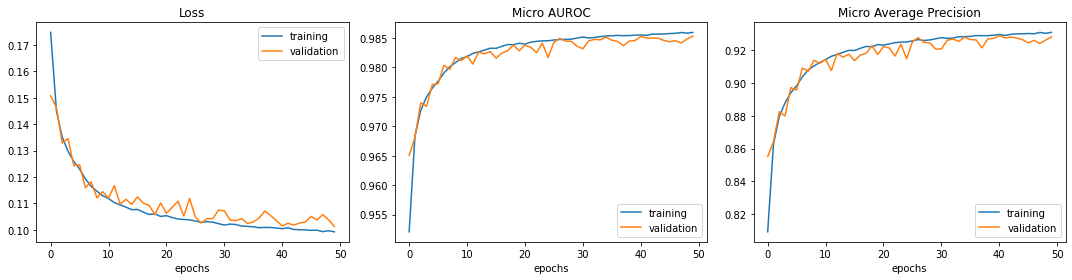

Plots of split_1_2_history


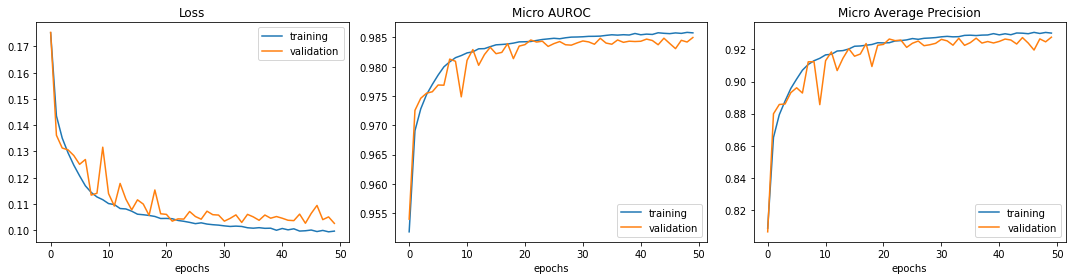

Plots of split_1_3_history


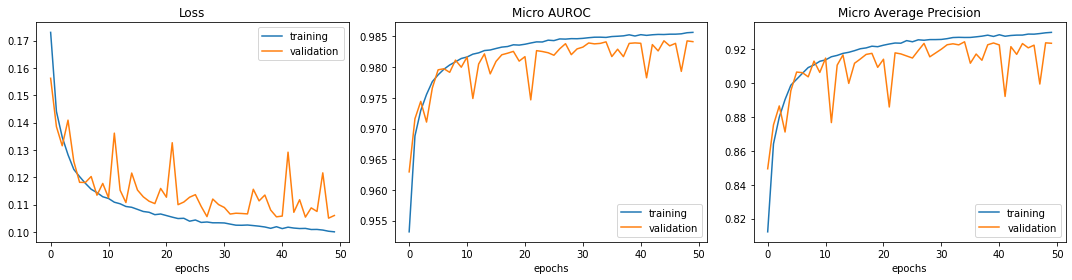

Plots of split_1_4_history


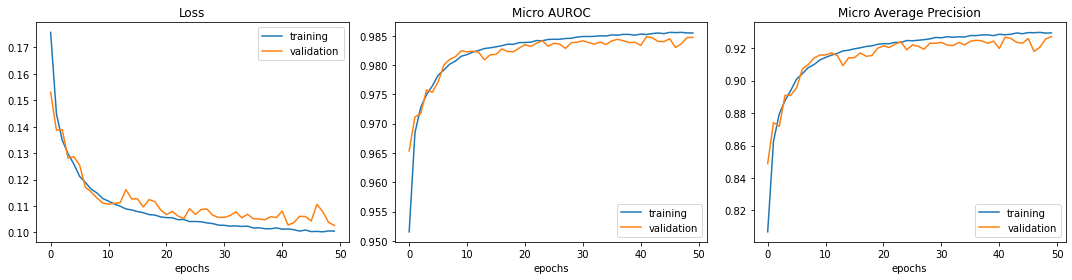

Plots of split_2_1_history


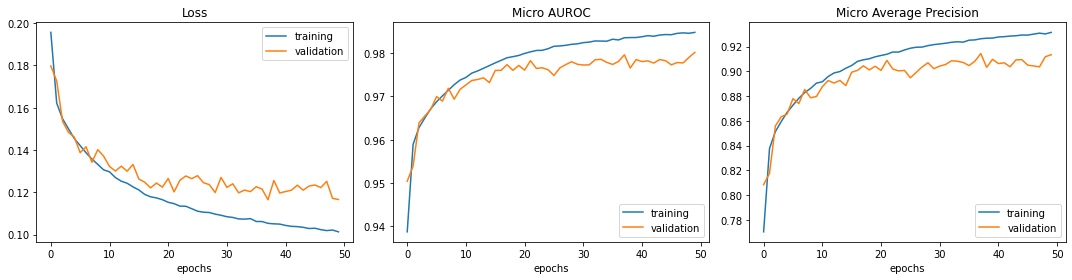

Plots of split_2_2_history


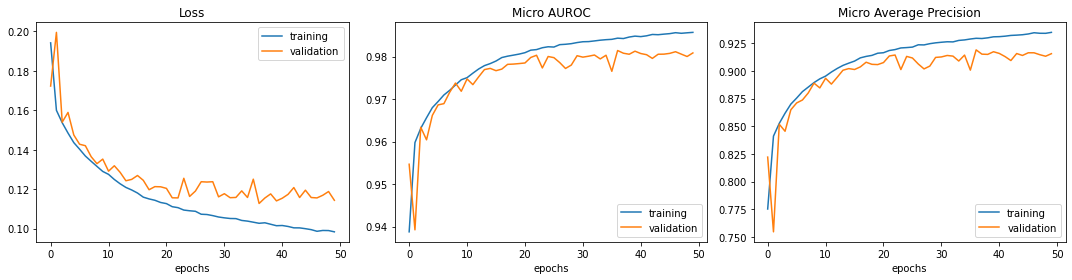

Plots of split_2_3_history


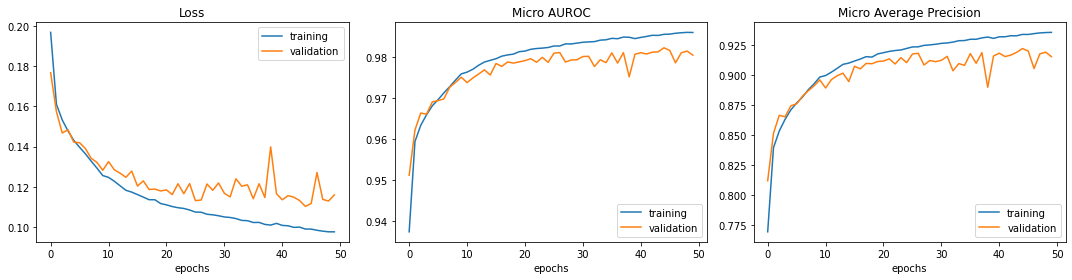

Plots of split_2_4_history


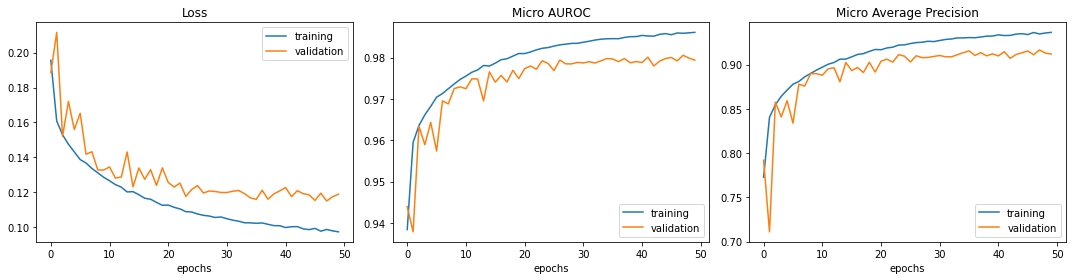

Plots of split_3_1_history


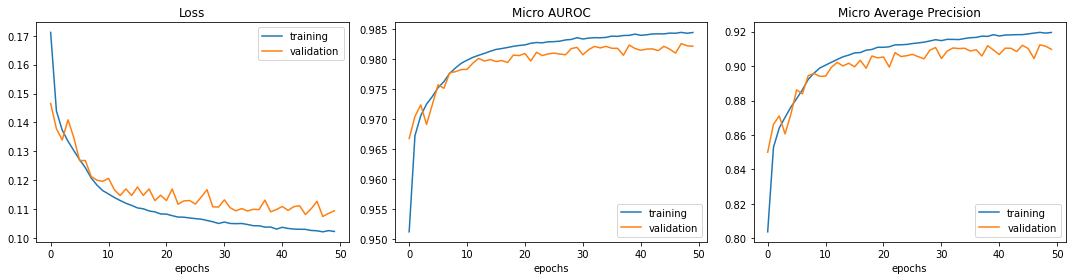

Plots of split_3_2_history


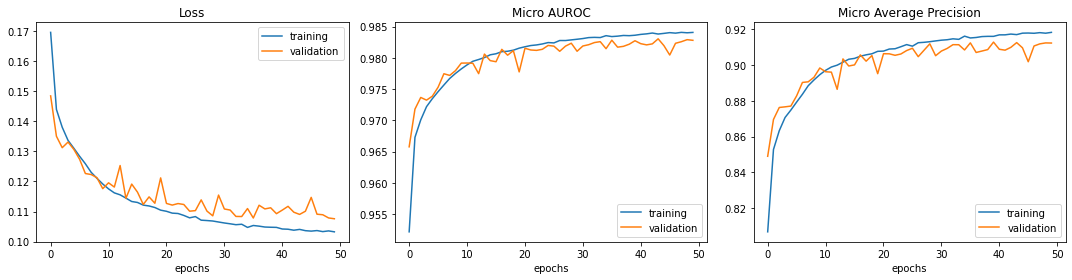

Plots of split_3_3_history


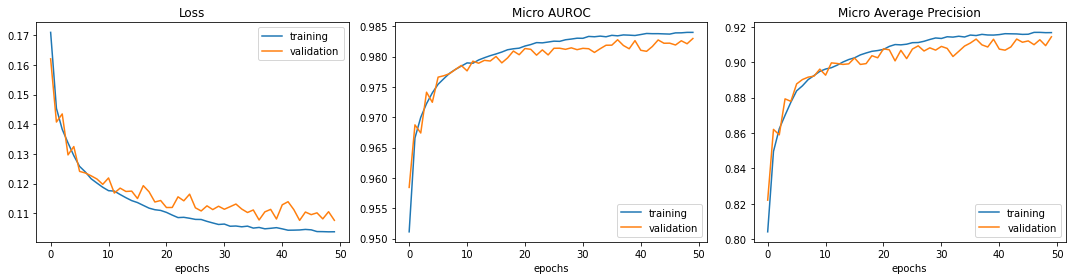

Plots of split_3_4_history


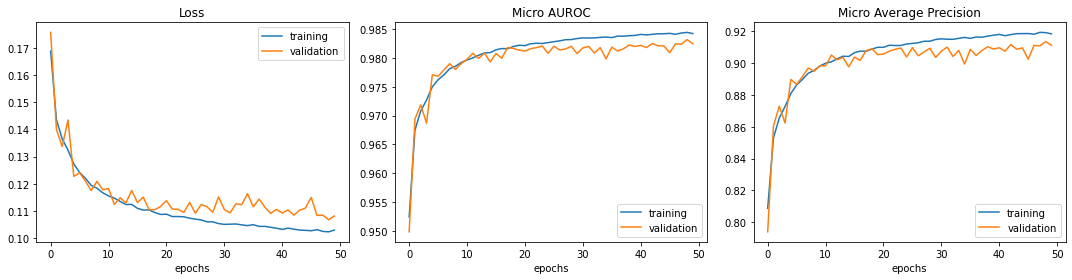

Plots of split_4_1_history


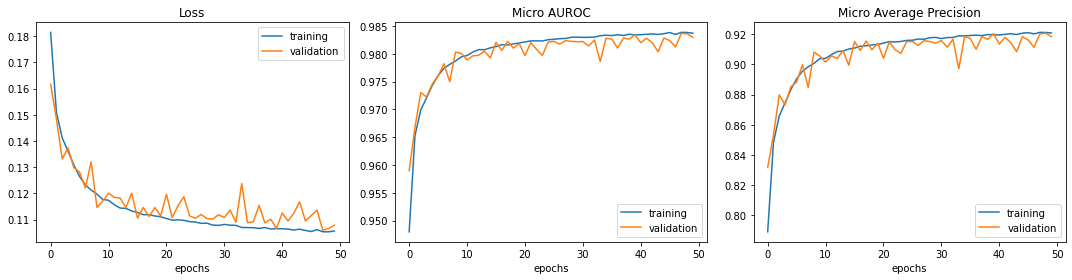

Plots of split_4_2_history


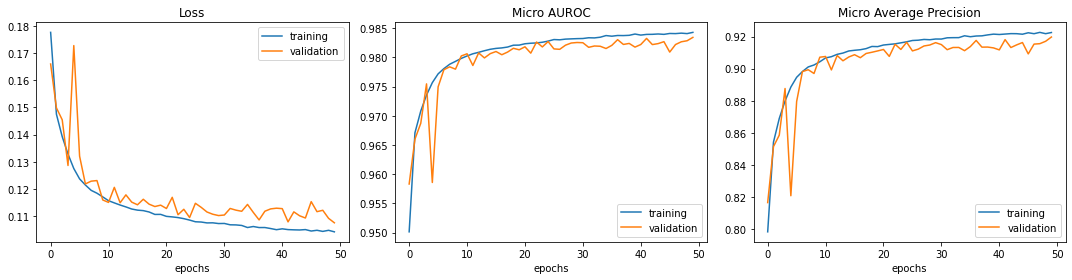

Plots of split_4_3_history


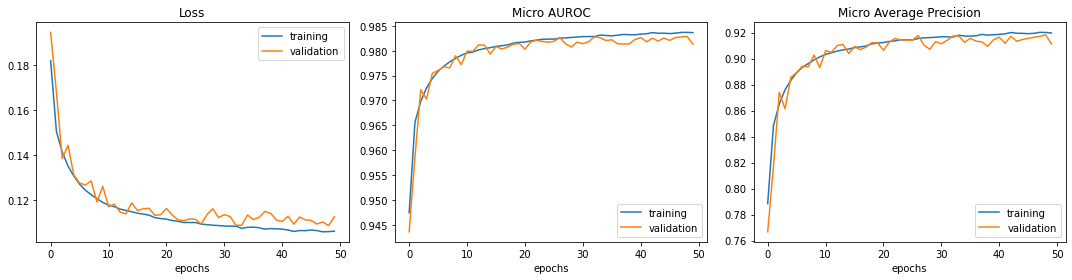

Plots of split_4_4_history


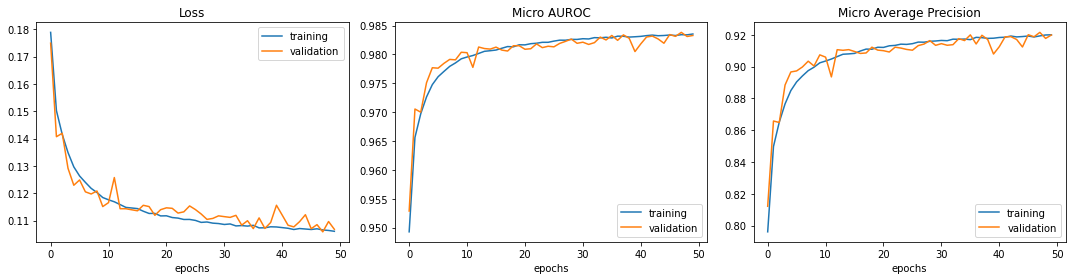

Plots of split_5_1_history


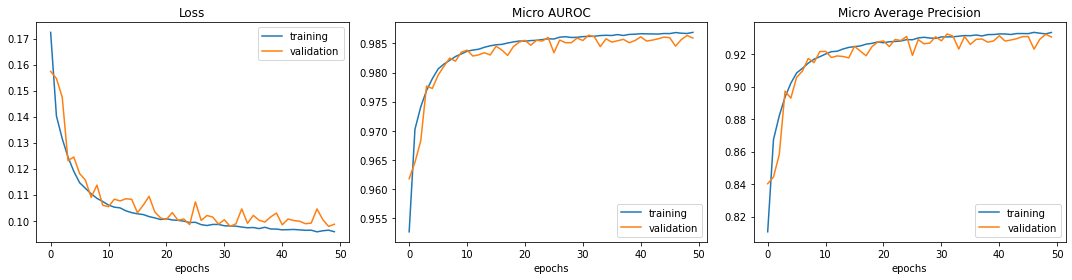

Plots of split_5_2_history


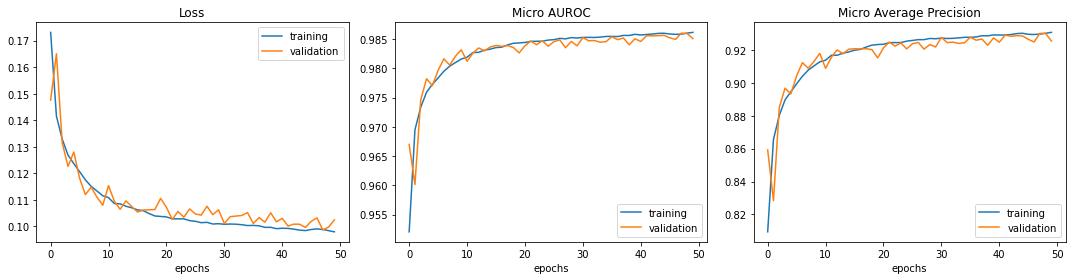

Plots of split_5_3_history


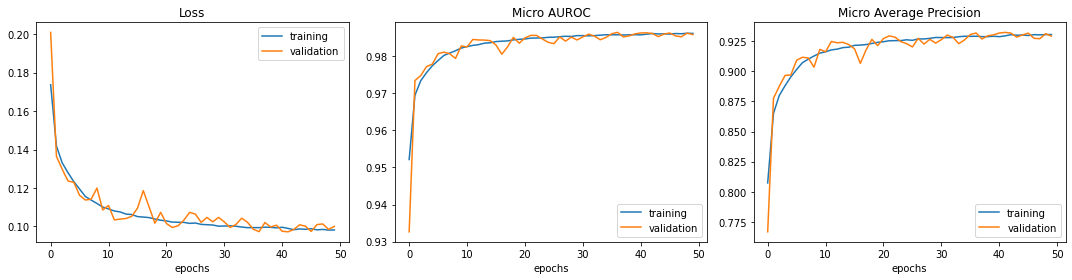

Plots of split_5_4_history


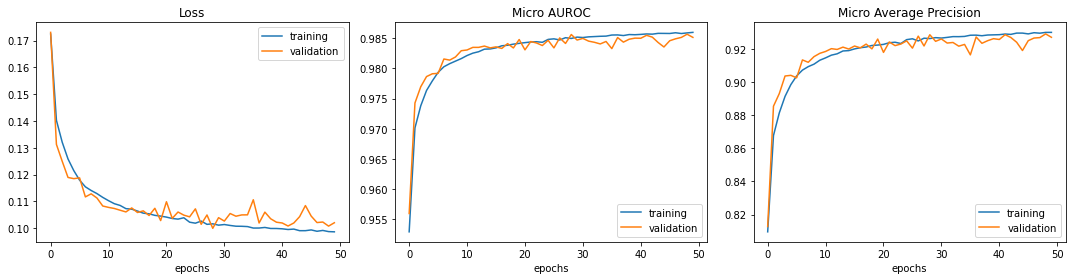

In [12]:
for path, history in train_histories:
    fig, axs = plt.subplots(1,3, figsize=(15, 4))

    print('Plots of {}'.format(os.path.basename(path).split('.')[0]))
    # train_loss & val_loss
    train_loss = history['train_loss']
    val_loss = history['val_loss']
    axs[0].plot(train_loss)
    axs[0].plot(val_loss)
    axs[0].set(title='Loss', xlabel = 'epochs')
    axs[0].legend(['training', 'validation'])

    # train_micro_auroc & val_micro_auroc
    train_loss = history['train_micro_auroc']
    val_loss = history['val_micro_auroc']
    axs[1].plot(train_loss)
    axs[1].plot(val_loss)
    axs[1].set(title='Micro AUROC', xlabel = 'epochs')
    axs[1].legend(['training', 'validation'],  loc = 'lower right')

    # train_micro_avg_auprc & val_micro_avg_auprc
    train_loss = history['train_micro_avg_auprc']
    val_loss = history['val_micro_avg_auprc']
    axs[2].plot(train_loss)
    axs[2].plot(val_loss)
    axs[2].set(title='Micro Average Precision', xlabel = 'epochs');
    axs[2].legend(['training', 'validation'], loc = 'lower right')

    fig.tight_layout()
    plt.show()

### 3.1.2 50th Epoch metrics and ROC curves  <a class="anchor" id="strat-epoch50"></a>

In [13]:
# Using split numbers as indexes
sources = [re.search('\d_\d', os.path.basename(value[0]))[0] for value in train_histories]
row_list = []

# Metrics on last epoch
for source, metrics in train_histories:
    
    row_dict = {
        'train_loss': metrics['train_loss'][-1],
        'train_micro_auroc': metrics['train_micro_auroc'][-1], 
        'train_macro_auroc': metrics['train_macro_auroc'][-1], 
        'train_micro_avg_prec': metrics['train_micro_avg_auprc'][-1],
        'train_macro_avg_prec': metrics['train_macro_avg_prec'][-1],
        'val_loss': metrics['val_loss'][-1],
        'val_micro_auroc': metrics['val_micro_auroc'][-1], 
        'val_macro_auroc': metrics['val_macro_auroc'][-1], 
        'val_micro_avg_prec': metrics['val_micro_avg_auprc'][-1],
        'val_macro_avg_prec': metrics['val_macro_avg_prec'][-1],
        }
    row_list.append(row_dict)
    
metrics_df = pd.DataFrame(row_list, index=sources)
display(metrics_df)

train_loss  train_micro_auroc  train_macro_auroc  train_micro_avg_prec  \
1_1    0.099249           0.985957           0.972444              0.930852   
1_2    0.099686           0.985786           0.971980              0.930212   
1_3    0.100052           0.985671           0.971863              0.929737   
1_4    0.100494           0.985479           0.971351              0.929354   
2_1    0.101275           0.984794           0.966212              0.931536   
2_2    0.098409           0.985678           0.968753              0.934790   
2_3    0.097548           0.985986           0.970110              0.935974   
2_4    0.097166           0.986080           0.970090              0.936520   
3_1    0.102235           0.984442           0.970648              0.919509   
3_2    0.103252           0.984075           0.970280              0.918099   
3_3    0.103811           0.983980           0.969957              0.916710   
3_4    0.102962           0.984246           0.970717              0.918484   
4_1    0.105644           0.983714           0.970183              0.920736   
4_2    0.104206           0.984269           0.970994              0.922510   
4_3    0.106145           0.983627           0.970066              0.919645   
4_4    0.106120           0.983545           0.969731              0.919955   
5_1    0.095762           0.986874           0.975055              0.933400   
5_2    0.097989           0.986144           0.973619              0.930817   
5_3    0.098189           0.986108           0.973544              0.930635   
5_4    0.098645           0.985973           0.973380              0.929911   

     train_macro_avg_prec  val_loss  val_micro_auroc  val_macro_auroc  \
1_1              0.800534  0.101246         0.985329         0.971651   
1_2              0.797466  0.102629         0.984993         0.971687   
1_3              0.796742  0.106029         0.984159         0.969826   
1_4              0.796890  0.102633         0.984720         0.971002   
2_1              0.775044  0.116573         0.980169         0.956928   
2_2              0.783233  0.114393         0.980845         0.959250   
2_3              0.785609  0.115956         0.980470         0.959202   
2_4              0.785591  0.118757         0.979356         0.956221   
3_1              0.787578  0.109391         0.982151         0.967062   
3_2              0.785809  0.107599         0.982811         0.968903   
3_3              0.782505  0.107664         0.982971         0.968436   
3_4              0.787338  0.108134         0.982479         0.967866   
4_1              0.793373  0.107885         0.982958         0.968449   
4_2              0.795246  0.107530         0.983413         0.969108   
4_3              0.791211  0.112590         0.981320         0.967932   
4_4              0.790589  0.106844         0.983289         0.969969   
5_1              0.806374  0.098635         0.985895         0.973461   
5_2              0.799655  0.102495         0.985071         0.972805   
5_3              0.798582  0.100029         0.985796         0.973297   
5_4              0.797027  0.102035         0.985145         0.972612   

     val_micro_avg_prec  val_macro_avg_prec  
1_1            0.928099            0.799112  
1_2            0.927667            0.800497  
1_3            0.923317            0.786649  
1_4            0.927078            0.794583  
2_1            0.913496            0.721574  
2_2            0.915548            0.733429  
2_3            0.915678            0.728809  
2_4            0.912053            0.733910  
3_1            0.909714            0.775868  
3_2            0.912154            0.776422  
3_3            0.914343            0.777751  
3_4            0.911340            0.776996  
4_1            0.918283            0.786112  
4_2            0.919712            0.789955  
4_3            0.911209            0.786162  
4_4            0.919863            0.793056  
5_1            0.930621      

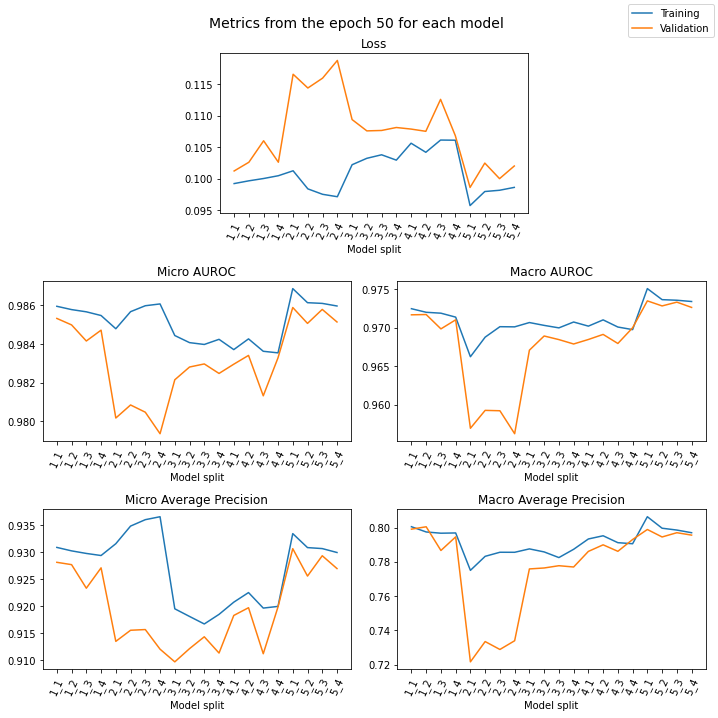

In [14]:
fig = plt.figure(figsize=(10, 10))
fig.suptitle('Metrics from the epoch 50 for each model', size = 14)
spec = mpl.gridspec.GridSpec(ncols=4, nrows=3) 

ax1 = fig.add_subplot(spec[0,1:3])
ax1.plot(metrics_df['train_loss'], label = 'Training')
ax1.plot(metrics_df['val_loss'], label = 'Validation')
ax1.tick_params(axis='x', rotation=65)
ax1.set(xlabel = 'Model split', title='Loss')

ax2 = fig.add_subplot(spec[1,0:2])
ax2.plot(metrics_df['train_micro_auroc'])
ax2.plot(metrics_df['val_micro_auroc'])
ax2.tick_params(axis='x', rotation=65)
ax2.set(xlabel = 'Model split', title='Micro AUROC')

ax3 = fig.add_subplot(spec[1,2:4])
ax3.plot(metrics_df['train_macro_auroc'])
ax3.plot(metrics_df['val_macro_auroc'])
ax3.tick_params(axis='x', rotation=65)
ax3.set(xlabel = 'Model split', title='Macro AUROC')

ax4 = fig.add_subplot(spec[2,0:2]) 
ax4.plot(metrics_df['train_micro_avg_prec'])
ax4.plot(metrics_df['val_micro_avg_prec'])
ax4.tick_params(axis='x', rotation=65)
ax4.set(xlabel = 'Model split', title='Micro Average Precision')

ax5 = fig.add_subplot(spec[2,2:4])
ax5.plot(metrics_df['train_macro_avg_prec'])
ax5.plot(metrics_df['val_macro_avg_prec'])
ax5.tick_params(axis='x', rotation=65)
ax5.set(xlabel = 'Model split', title='Macro Average Precision')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.tight_layout()
plt.show()

Quite different results from the models 1_0-1_3 where the training and validation sets were performed splitted from the databases G12EC, INCART, PTB_PTBXL and CPSC_CPSC-Extra, so that the ChapmanShaoxing_Ningbo was for testing only. Note! ChapmanShaoxing_Ningbo contains 40 258 ECGs (which is almost half of the whole dataset [in total 88 253]). 

In [15]:
for col in metrics_df:
    print(color.BOLD + f'metric: {col}' + color.END)
    print(f'\t Min value {min(metrics_df[col].round(4))}')
    print(f'\t Max value {max(metrics_df[col].round(4))}')
    print()

metric: train_loss
	 Min value 0.0958
	 Max value 0.1061

metric: train_micro_auroc
	 Min value 0.9835
	 Max value 0.9869

metric: train_macro_auroc
	 Min value 0.9662
	 Max value 0.9751

metric: train_micro_avg_prec
	 Min value 0.9167
	 Max value 0.9365

metric: train_macro_avg_prec
	 Min value 0.775
	 Max value 0.8064

metric: val_loss
	 Min value 0.0986
	 Max value 0.1188

metric: val_micro_auroc
	 Min value 0.9794
	 Max value 0.9859

metric: val_macro_auroc
	 Min value 0.9562
	 Max value 0.9735

metric: val_micro_avg_prec
	 Min value 0.9097
	 Max value 0.9306

metric: val_macro_avg_prec
	 Min value 0.7216
	 Max value 0.8005



In [16]:
display(metrics_df.describe())

train_loss  train_micro_auroc  train_macro_auroc  train_micro_avg_prec  \
count   20.000000          20.000000          20.000000             20.000000   
mean     0.100942           0.985121           0.971049              0.926969   
std      0.003180           0.001039           0.001972              0.006668   
min      0.095762           0.983545           0.966212              0.916710   
25%      0.098354           0.984203           0.970084              0.919877   
50%      0.100273           0.985575           0.970682              0.929824   
75%      0.103392           0.985976           0.972096              0.931023   
max      0.106145           0.986874           0.975055              0.936520   

       train_macro_avg_prec   val_loss  val_micro_auroc  val_macro_auroc  \
count             20.000000  20.000000        20.000000        20.000000   
mean               0.791820   0.107452         0.983167         0.967783   
std                0.007655   0.005788         0.001982         0.005444   
min                0.775044   0.098635         0.979356         0.956221   
25%                0.785759   0.102596         0.981943         0.967665   
50%                0.792292   0.107565         0.983130         0.969006   
75%                0.797137   0.110191         0.985013         0.971660   
max                0.806374   0.118757         0.985895         0.973461   

       val_micro_avg_prec  val_macro_avg_prec  
count           20.000000           20.000000  
mean             0.919599            0.777350  
std              0.007106            0.025876  
min              0.909714            0.721574  
25%              0.913160            0.776283  
50%              0.918998            0.786406  
75%              0.926976            0.794843  
max              0.930621            0.800497

### 3.1.3. ROC Curves  <a class="anchor" id="strat-rocs"></a>

ROC Curves in ROC_split_1_1


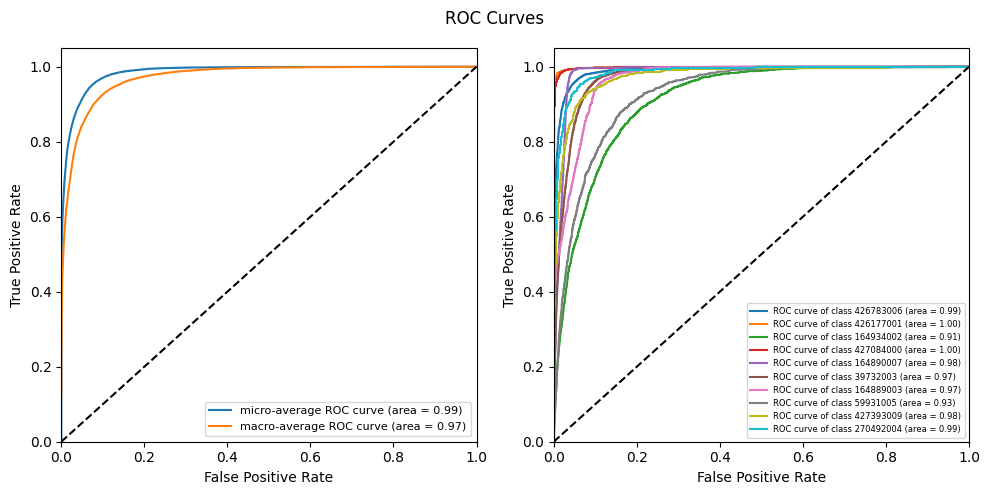

ROC Curves in ROC_split_1_2


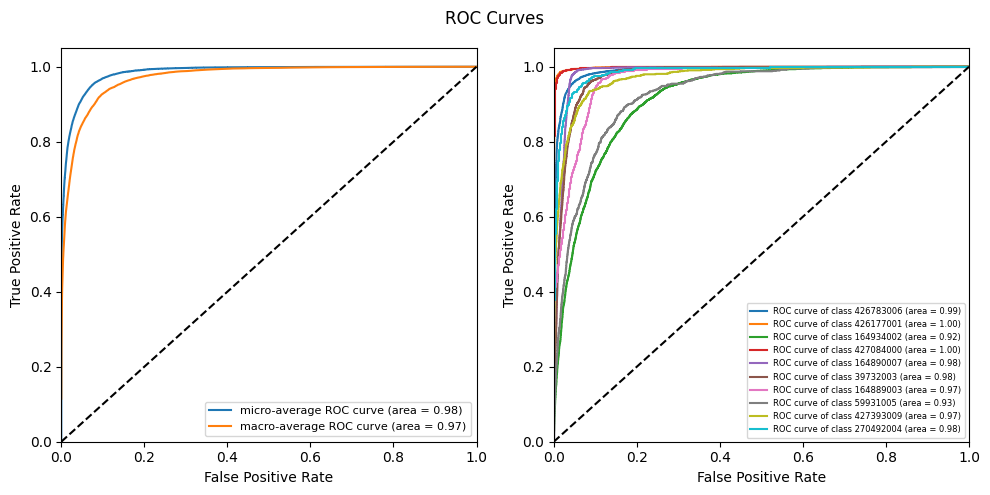

ROC Curves in ROC_split_1_3


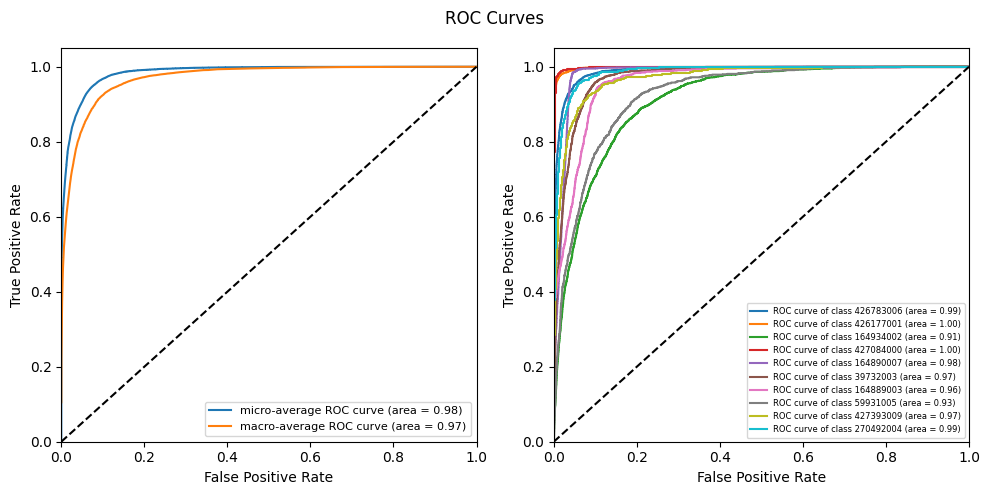

ROC Curves in ROC_split_1_4


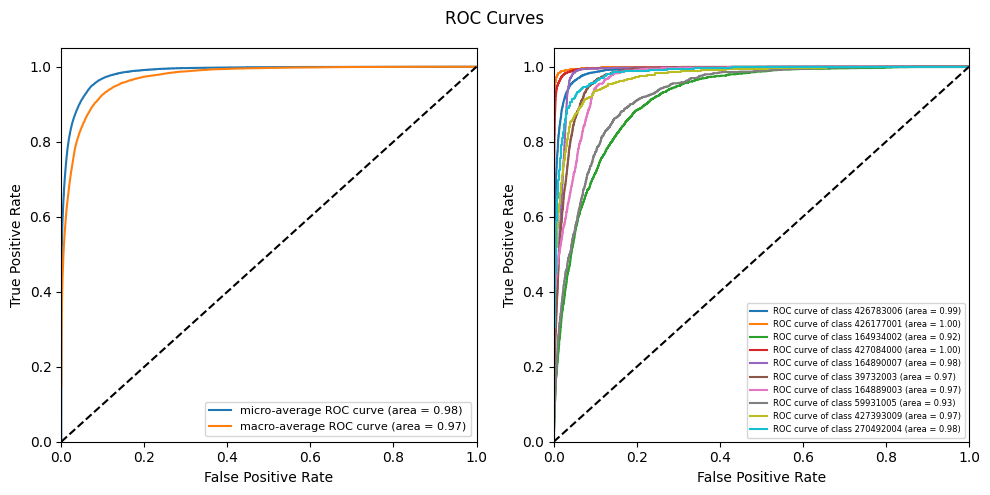

ROC Curves in ROC_split_2_1


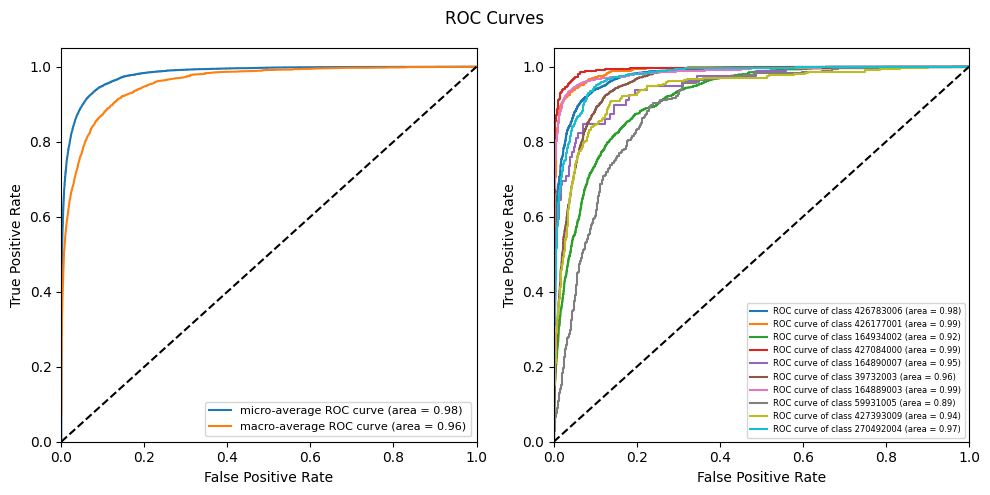

ROC Curves in ROC_split_2_2


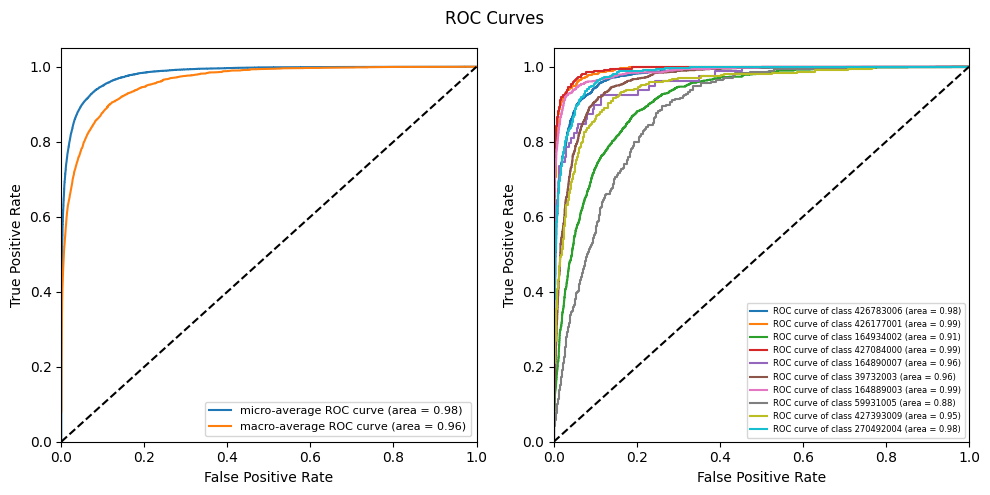

ROC Curves in ROC_split_2_3


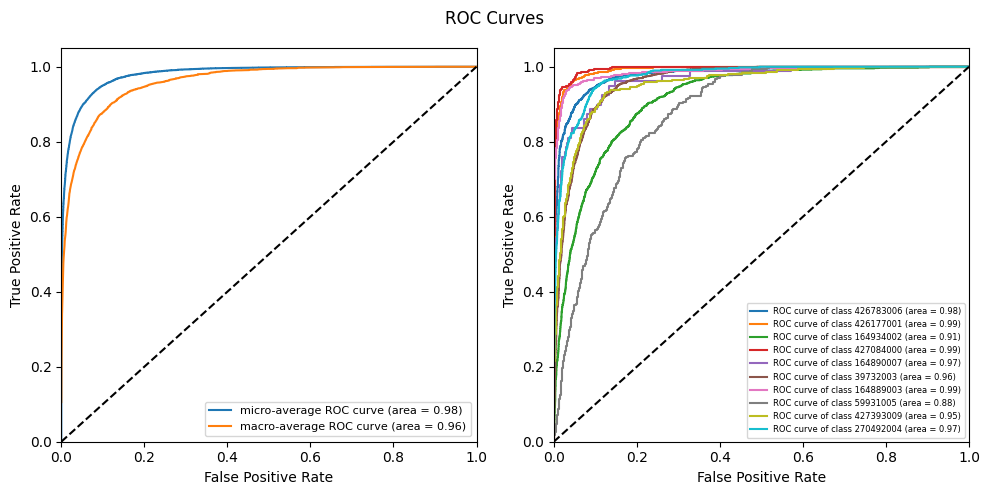

ROC Curves in ROC_split_2_4


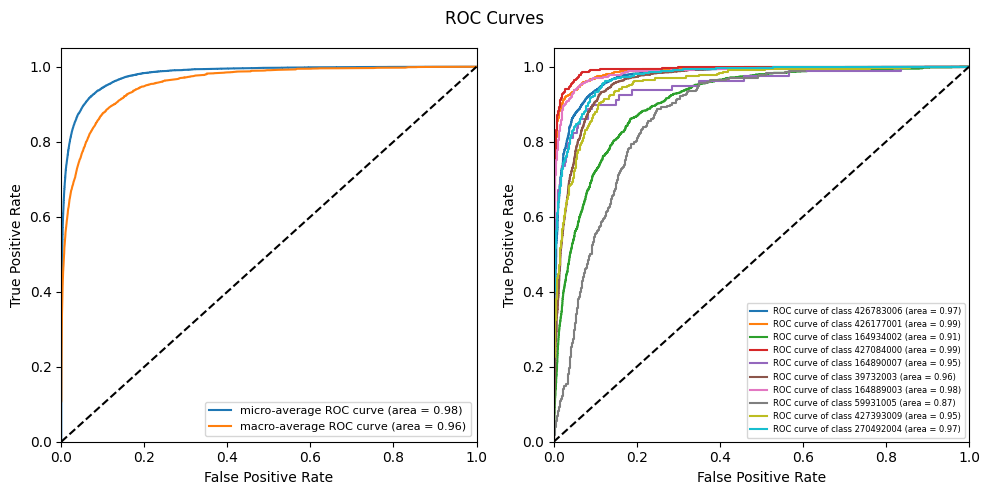

ROC Curves in ROC_split_3_2


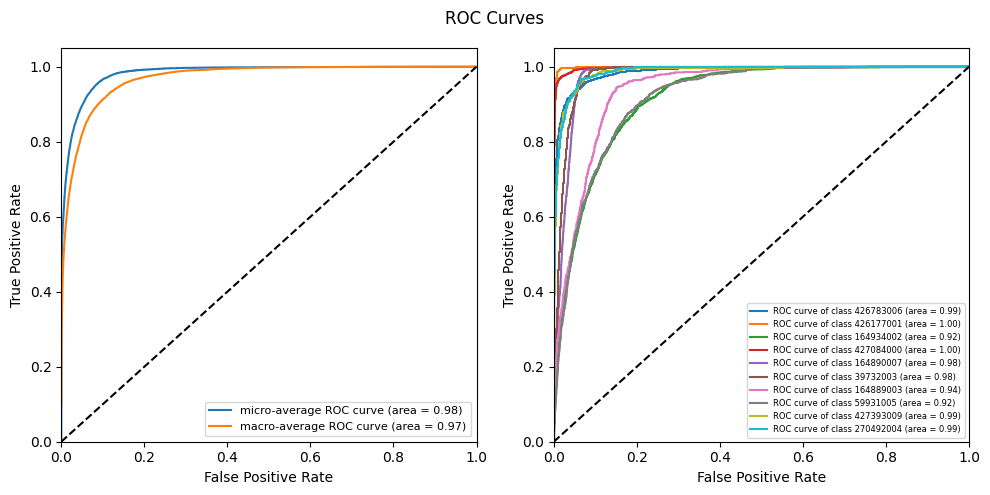

ROC Curves in ROC_split_3_3


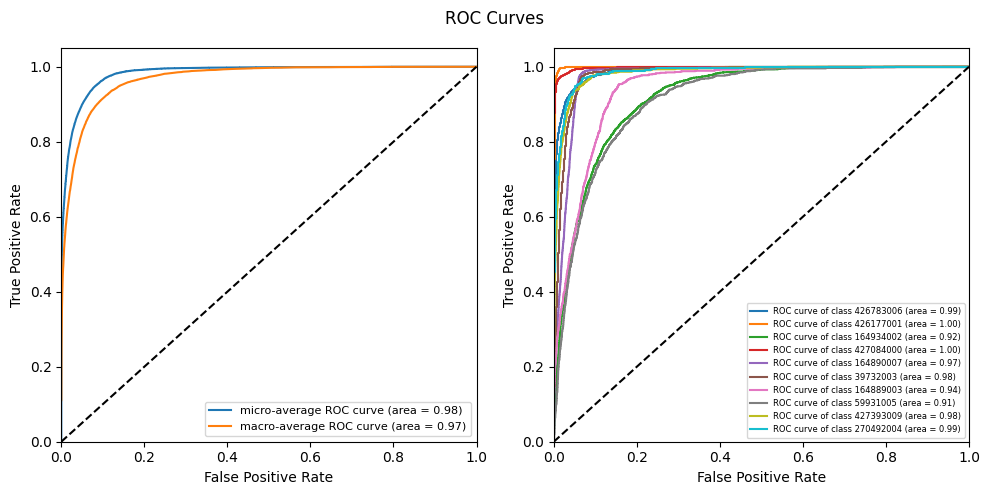

ROC Curves in ROC_split_3_4


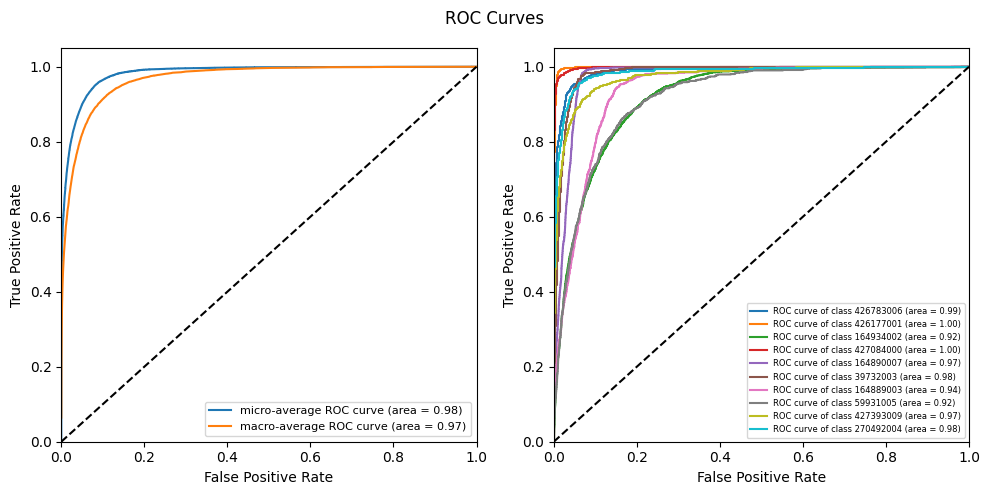

ROC Curves in ROC_split_4_1


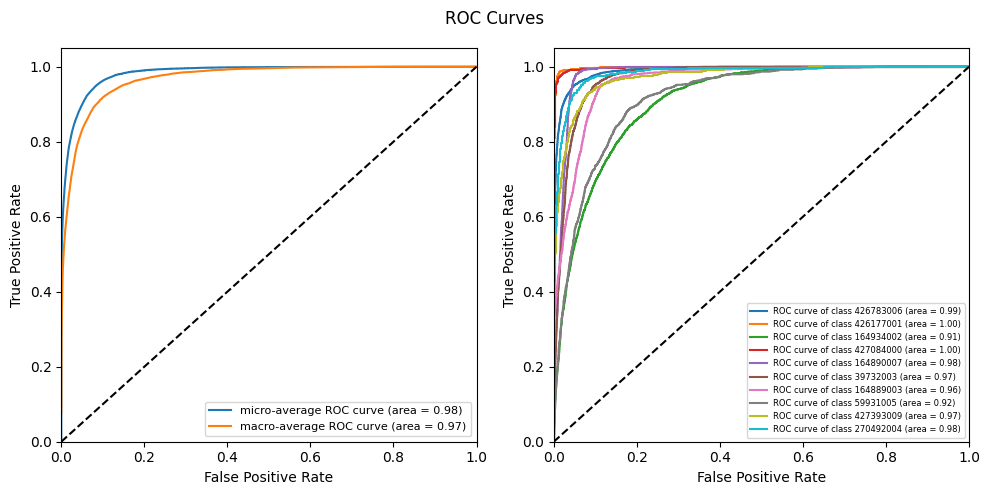

ROC Curves in ROC_split_4_2


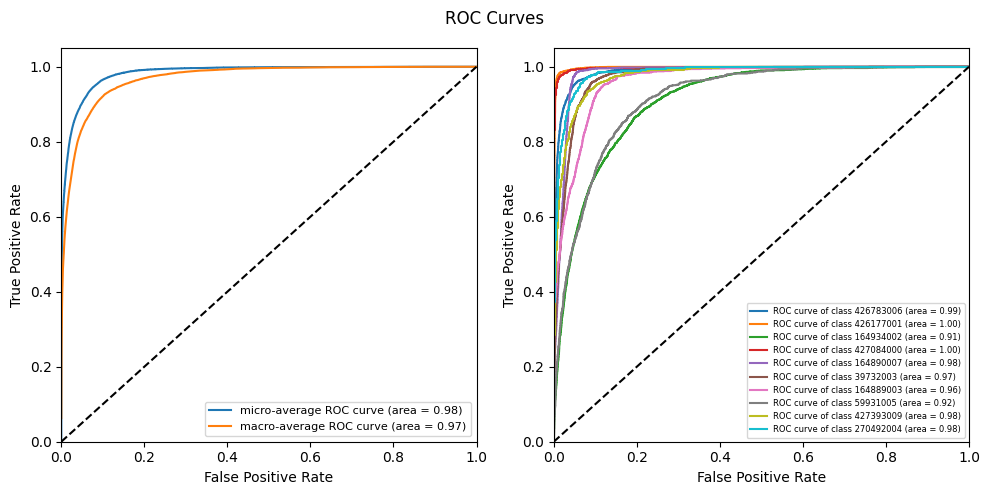

ROC Curves in ROC_split_4_3


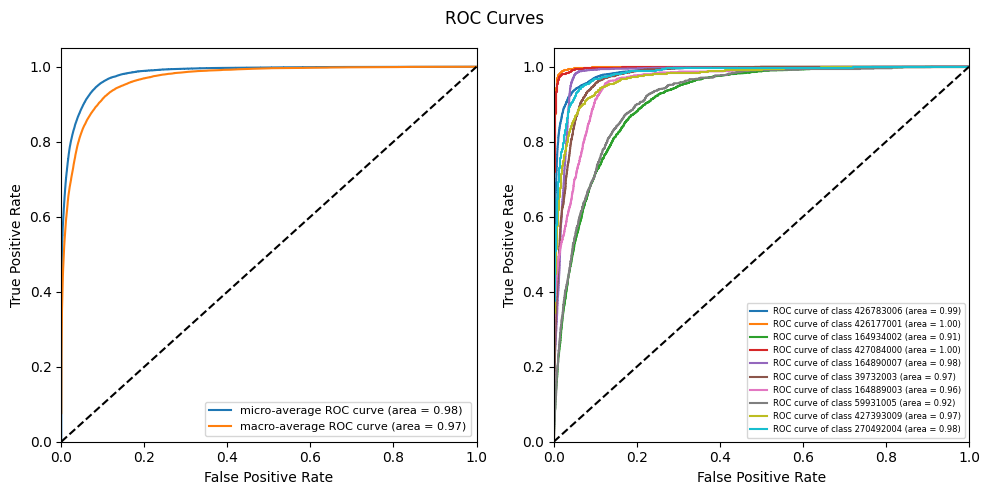

ROC Curves in ROC_split_4_4


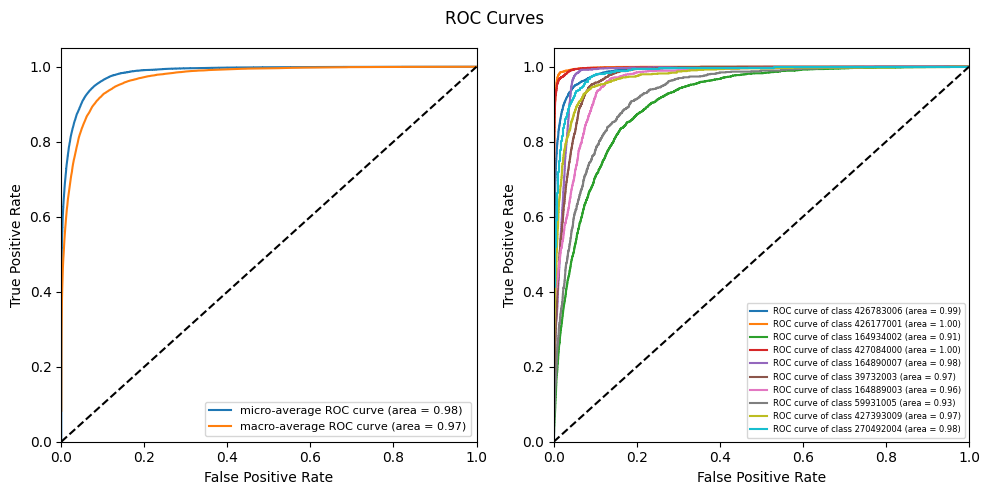

ROC Curves in ROC_split_5_1


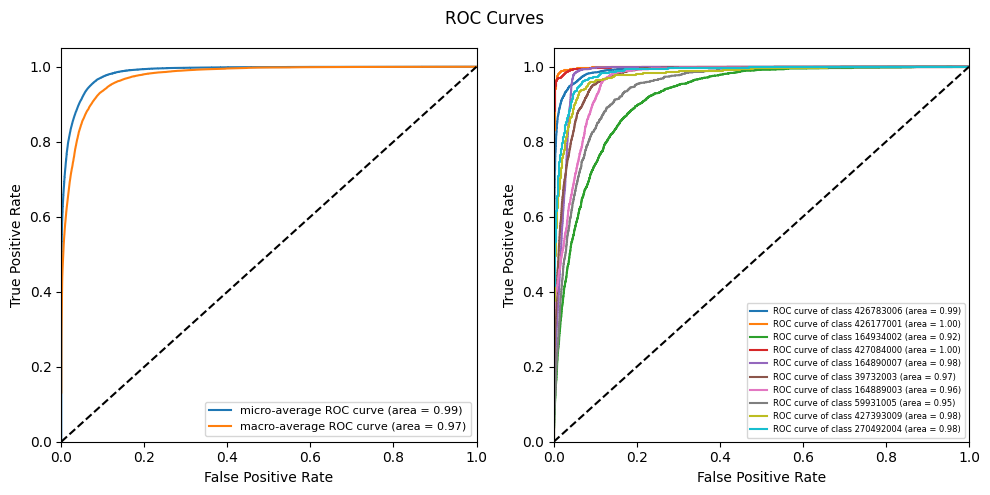

ROC Curves in ROC_split_5_2


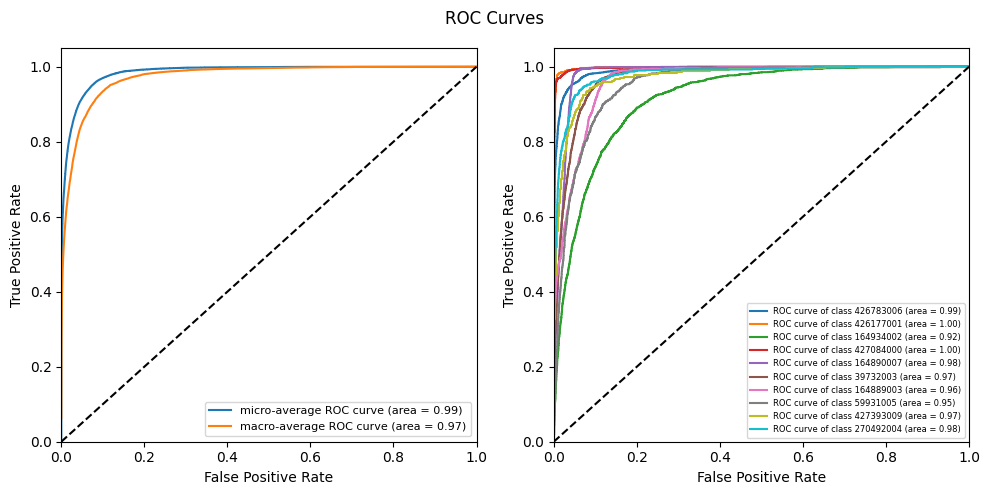

ROC Curves in ROC_split_5_3


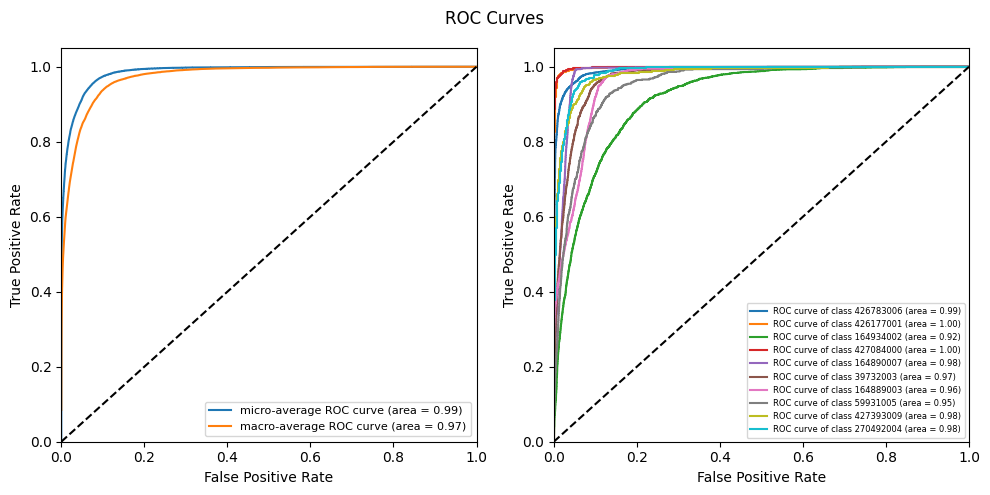

ROC Curves in ROC_split_5_4


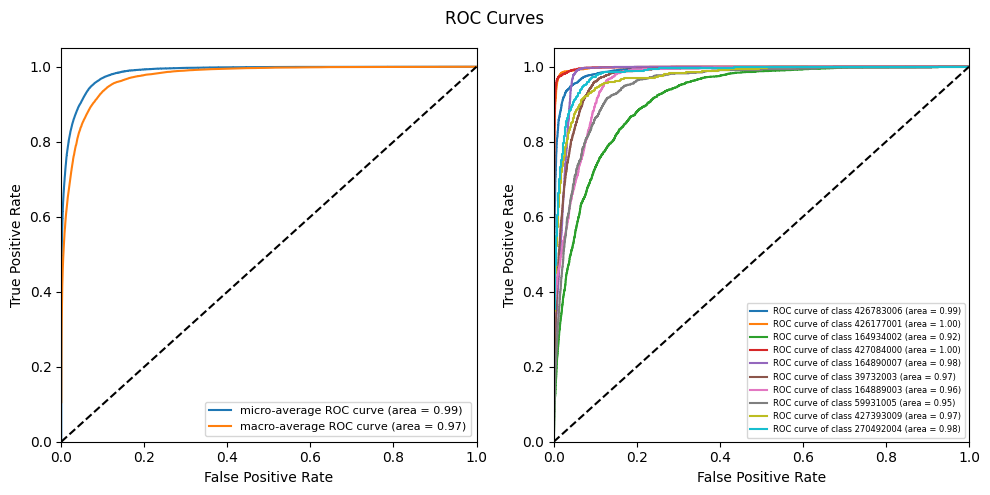

In [17]:
roc_path = os.path.join(exp_path, 'train_stratified')
roc_dirs = [os.path.join(roc_path, file) for file in os.listdir(roc_path) if not file.startswith('.') and os.path.isdir(os.path.join(roc_path, file))]
roc_dirs = sorted(roc_dirs)

for directory in roc_dirs:

    print(color.UNDERLINE + color.GREEN + 'ROC Curves in {}'.format(os.path.basename(directory)) + color.END)
    
    # last ROC Curve
    last_roc = os.path.join(directory, 'roc-e50.png')
    last_roc_image = Image(last_roc, width=700)

    display(last_roc_image)

-----

## 3.2 Predictions and Evaluation Metrics <a class="anchor" id="preds"></a>


In [18]:
# All histories are in the experiments directory
exp_path = '../experiments/'

# Get all evaluation history files in the experiments directory
# NB! Might have subdirectories
eval_metric_files = []
for path, subdirs, files in os.walk(exp_path):
    for file in files:
        if file.endswith('.pickle') and 'test' in file:
            eval_metric_files.append(os.path.join(path, file))

print(*eval_metric_files, sep='\n')

../experiments/predict_DBwise_smoke/split_3/test_history.pickle
../experiments/predict_DBwise_smoke/split_2/test_history.pickle
../experiments/predict_DBwise_smoke/split_4/test_history.pickle
../experiments/predict_DBwise_smoke/split_1/test_history.pickle
../experiments/sample/split_5_1/split_5_1_test_history.pickle
../experiments/sample/split_4_1/split_4_1_test_history.pickle
../experiments/sample/split_3_1/split_3_1_test_history.pickle
../experiments/sample/split_1_1/split_1_1_test_history.pickle
../experiments/sample/split_2_1/split_2_1_test_history.pickle
../experiments/predict_smoke/predict_smoke_test_history.pickle
../experiments/predict_stratified_smoke/split_1_3/test_history.pickle
../experiments/predict_stratified_smoke/split_1_4/test_history.pickle
../experiments/predict_stratified_smoke/split_1_2/test_history.pickle
../experiments/predict_stratified_smoke/split_1_1/test_history.pickle
../experiments/testsplit_1_1/testsplit_1_1_test_history.pickle
../experiments/testsplit_1_1

In [20]:
# From where we want to load the evaluation history
wanted = 'sample'
wanted_files = sorted([file for file in eval_metric_files if wanted in file])

# --------------------------------------------#

# Load history
eval_metrics = []
for i in range(len(wanted_files)):
    with open(wanted_files[i], 'rb') as history_file:
        while True:
            try:
                eval_metrics.append([history_file.name, pickle.load(history_file)])
            except EOFError:
                break
            
            
print('Total of {} models used for prediction and evaluated'.format(len(eval_metrics)))

Total of 5 models used for prediction and evaluated


ROC Curves in split0_0


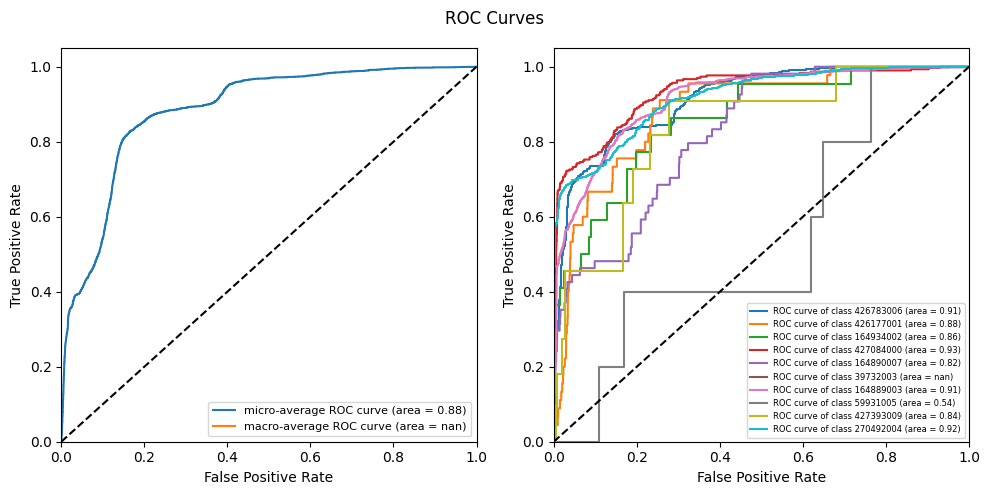

ROC Curves in split0_1


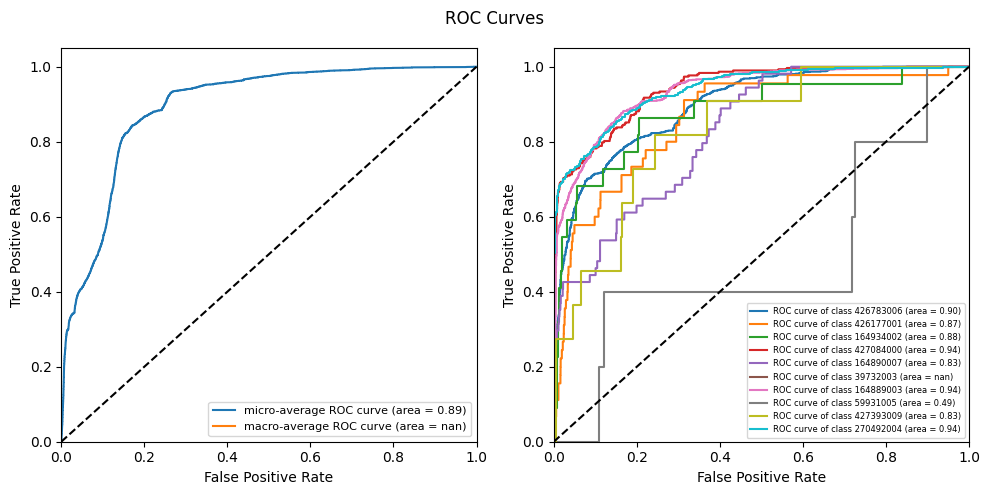

ROC Curves in split0_2


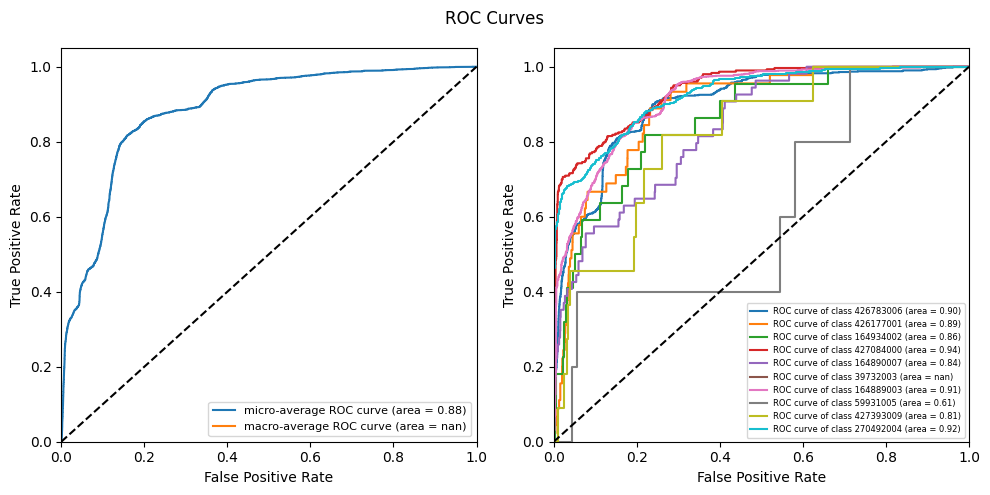

ROC Curves in split0_3


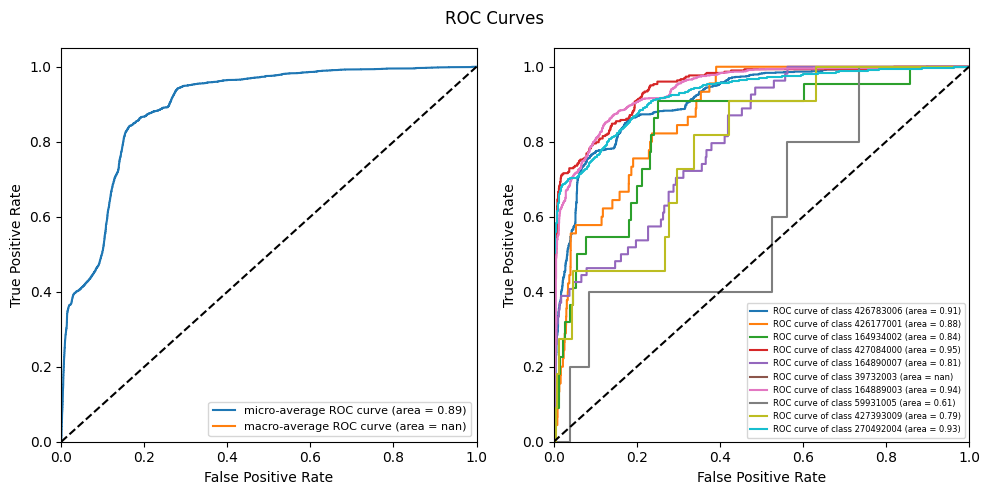

ROC Curves in split1_0


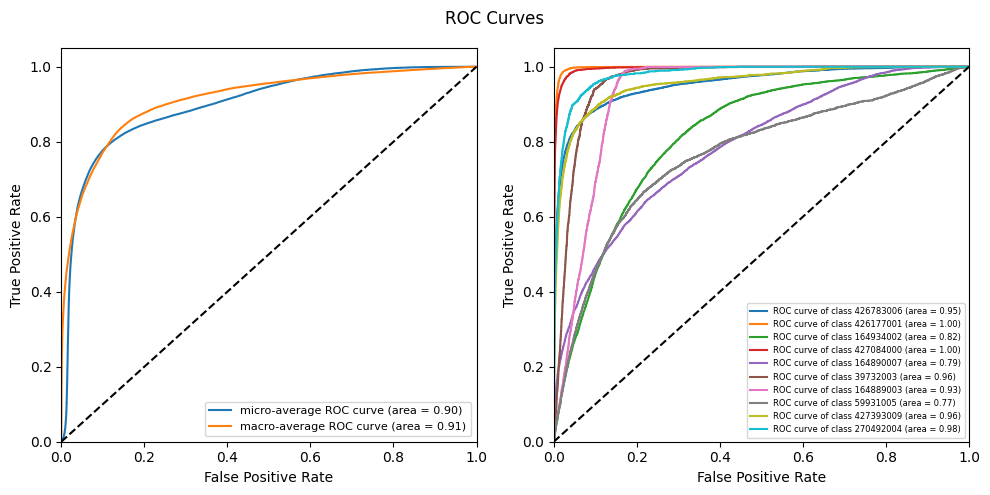

ROC Curves in split1_1


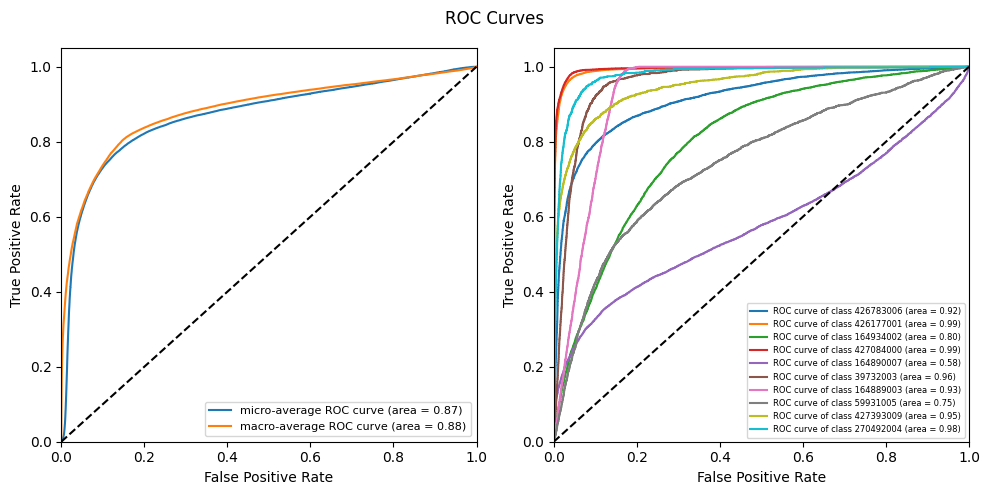

ROC Curves in split1_2


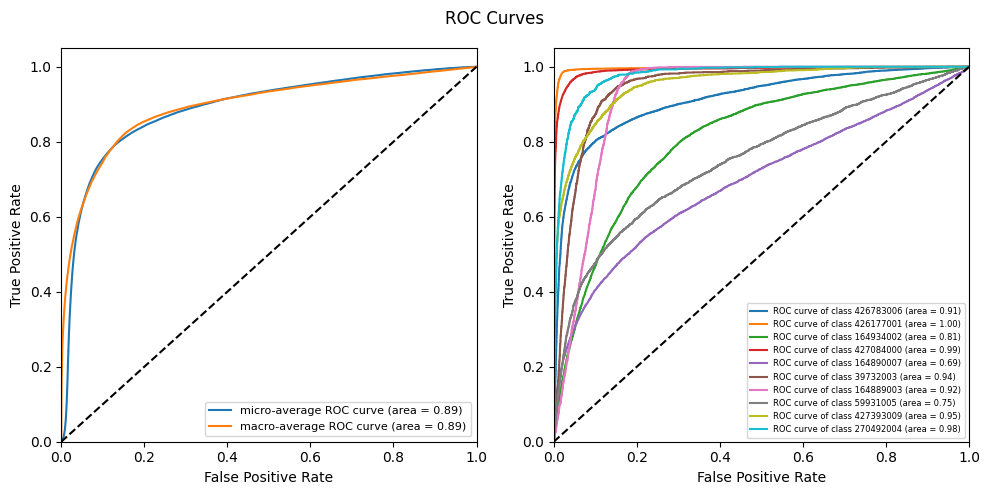

ROC Curves in split1_3


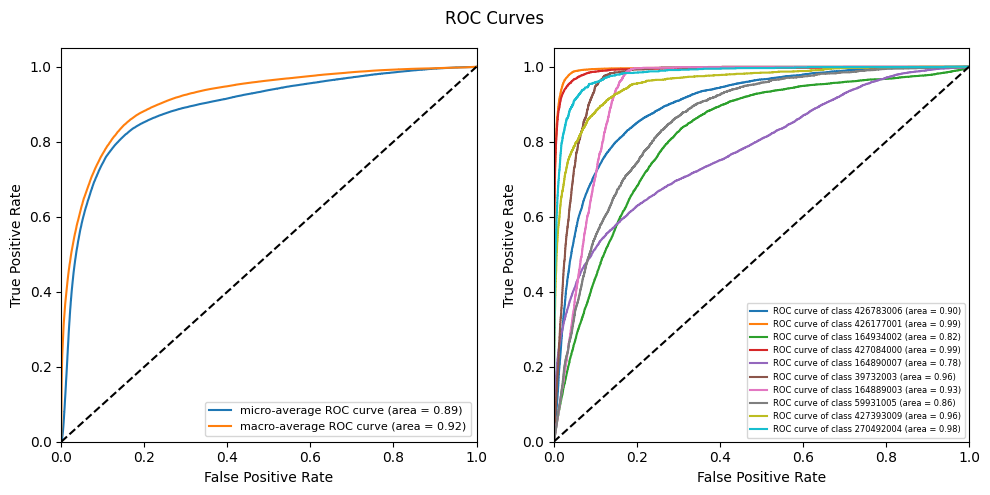

ROC Curves in split2_0


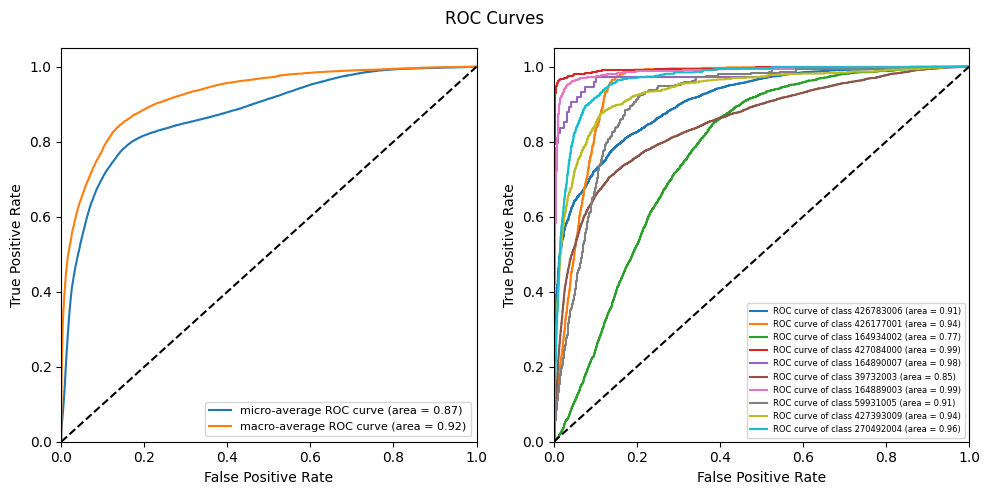

ROC Curves in split2_1


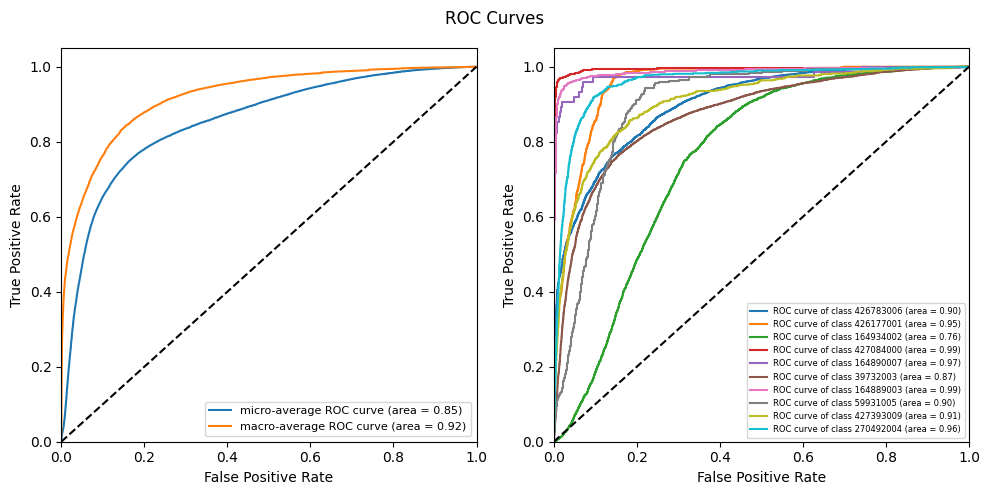

ROC Curves in split2_2


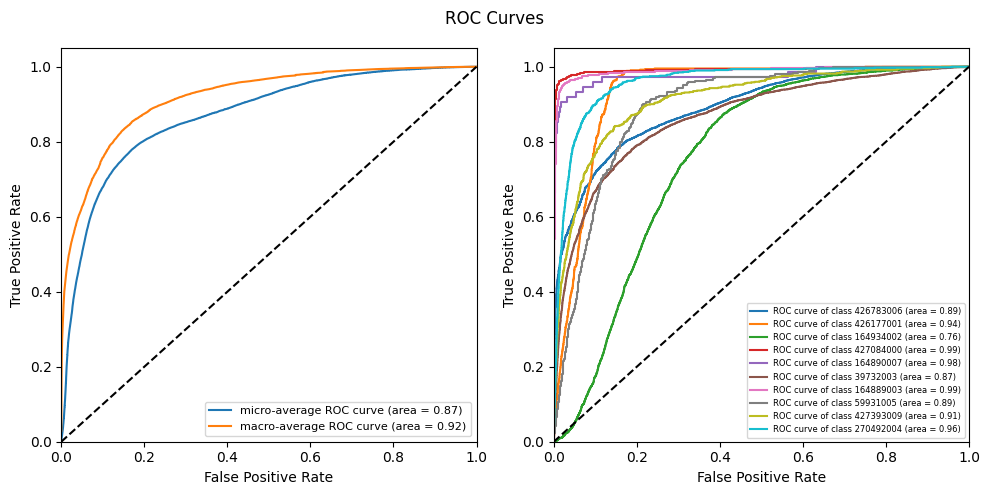

ROC Curves in split2_3


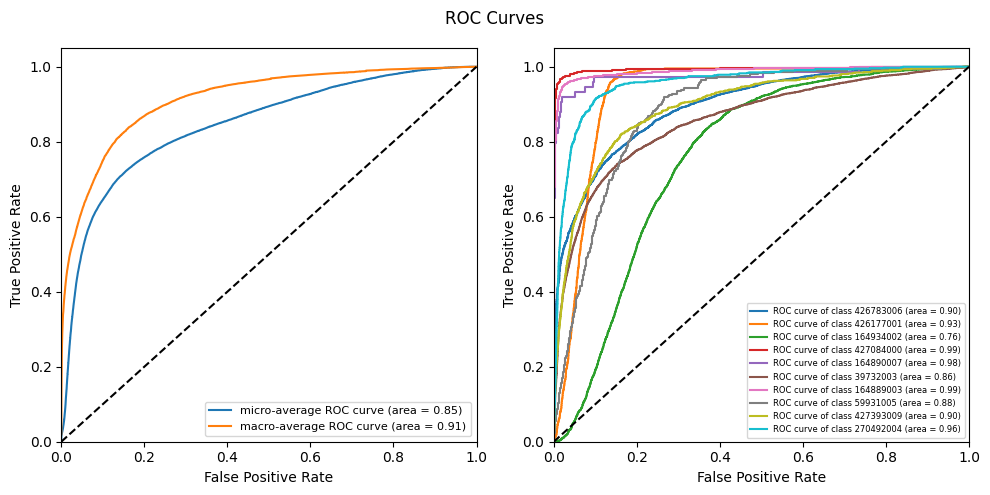

ROC Curves in split3_0


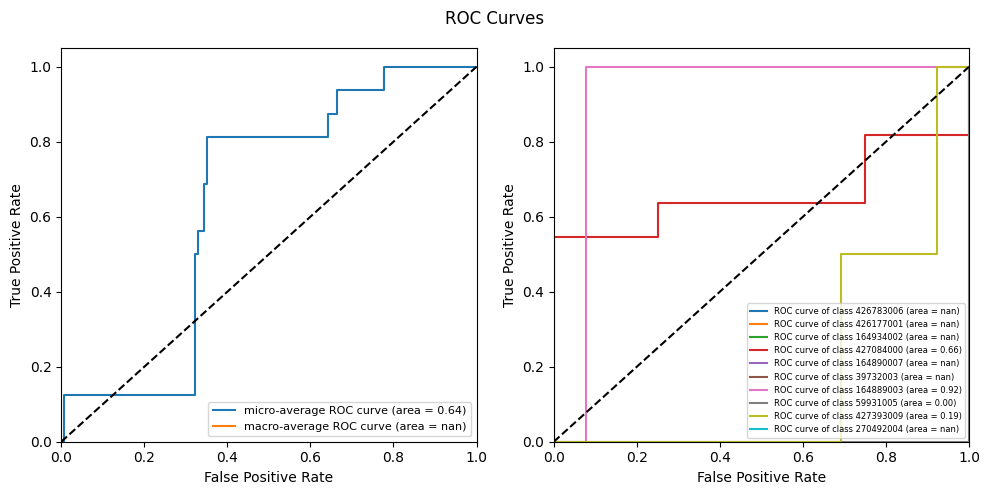

ROC Curves in split3_1


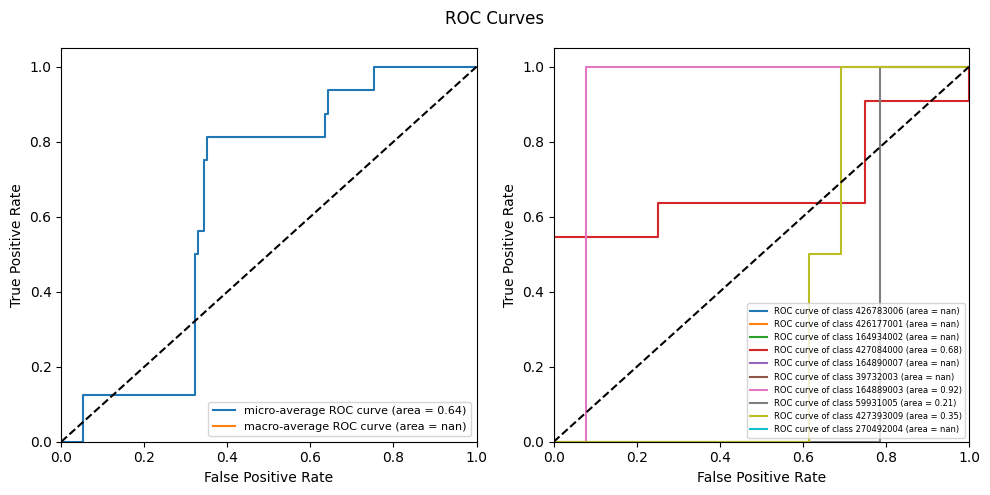

ROC Curves in split3_2


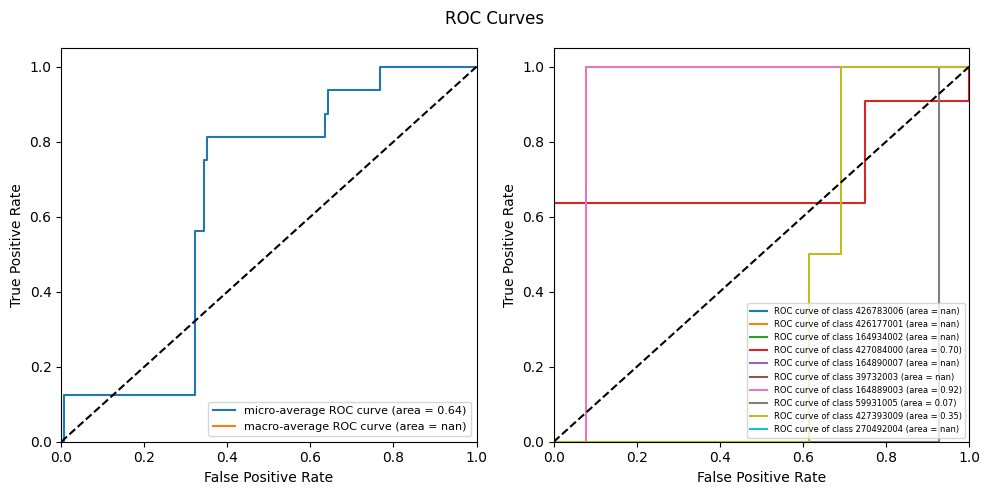

ROC Curves in split3_3


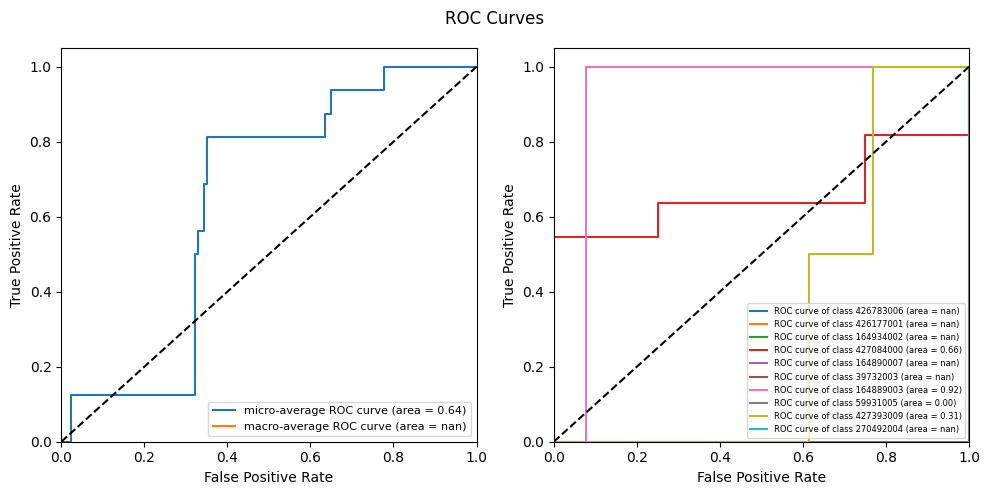

ROC Curves in split4_0


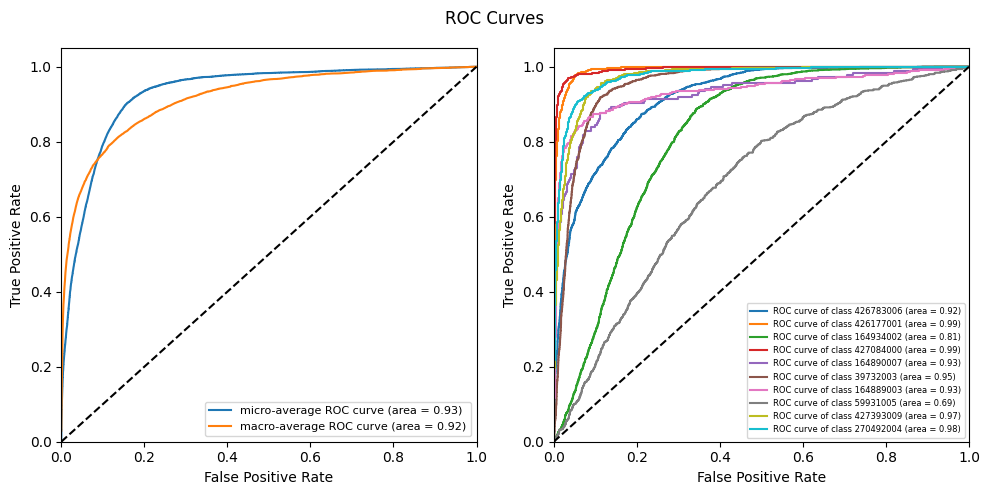

ROC Curves in split4_1


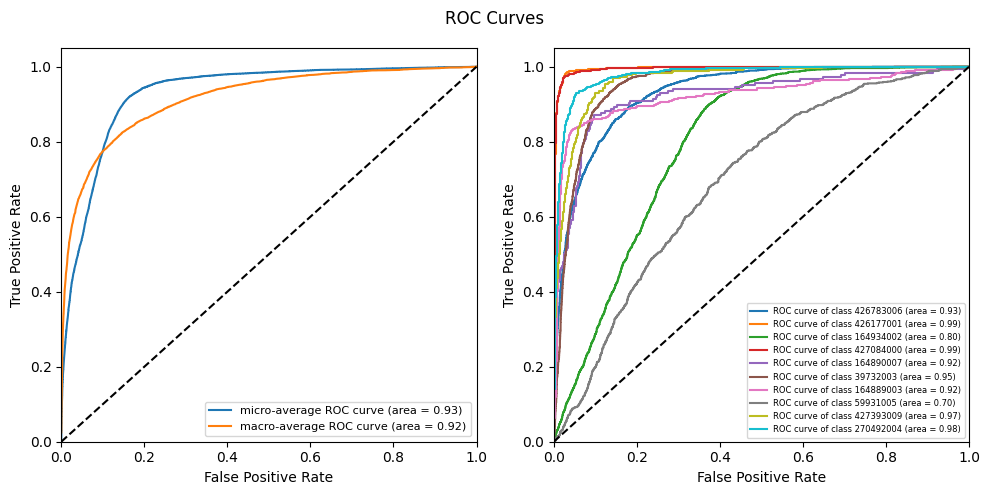

ROC Curves in split4_2


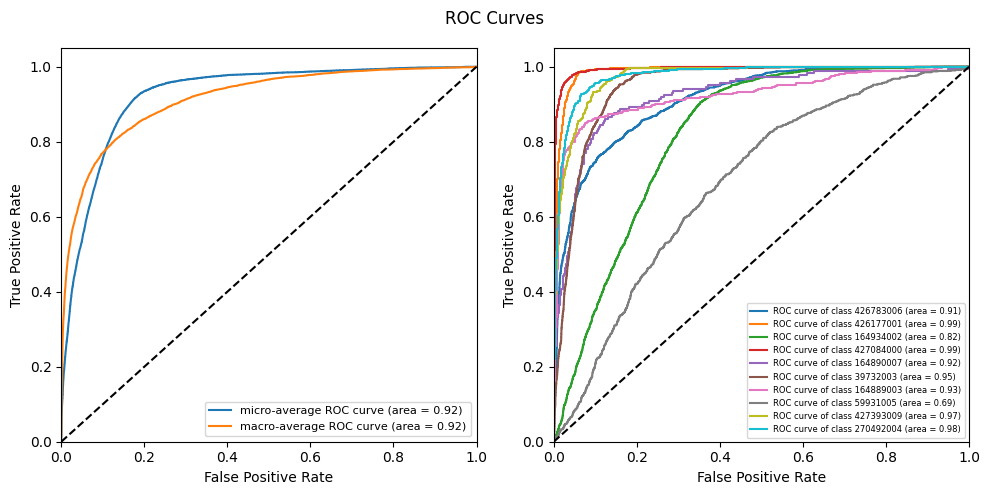

ROC Curves in split4_3


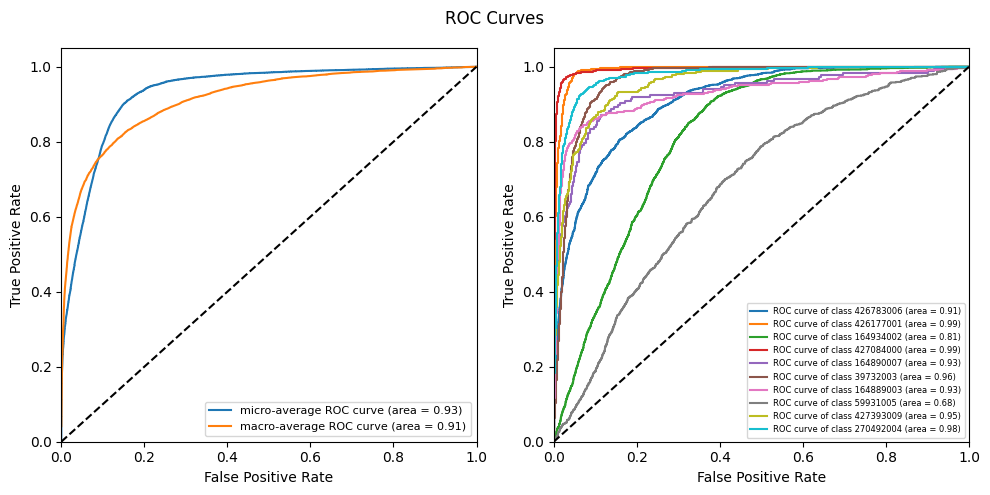

In [40]:
roc_path = os.path.join(exp_path, wanted)
roc_dirs = [os.path.join(roc_path, file) for file in os.listdir(roc_path) if not file.startswith('.') and os.path.isdir(os.path.join(roc_path, file))]
roc_dirs = sorted(roc_dirs)

for directory in roc_dirs:

    print(color.UNDERLINE + color.GREEN + 'ROC Curves in {}'.format(os.path.basename(directory)) + color.END)
    
    # last ROC Curve
    last_roc = os.path.join(directory, 'roc-test.png')
    last_roc_image = Image(last_roc, width=700)

    display(last_roc_image)

### 3.2.1. Evaluation metrics<a class="anchor" id="eval-metrics"></a>

In [46]:
# Using split numbers as indexes
sources = [re.search('\d_\d', os.path.basename(value[0]))[0] for value in train_histories]
row_list = []

print('split numbers:', sources)

for _, metrics in eval_metrics:
    row_dict= {
        'test_micro_avg_prec': metrics['test_micro_avg_prec'],
        'test_micro_auroc': metrics['test_micro_auroc'],
        'test_macro_avg_prec': metrics['test_macro_avg_prec'],
        'test_macro_auroc': metrics['test_macro_auroc']
    }
    row_list.append(row_dict)
    
eval_df = pd.DataFrame(row_list, index=sources)
display(eval_df)

split numbers: ['0_0', '0_1', '0_2', '0_3', '1_0', '1_1', '1_2', '1_3', '2_0', '2_1', '2_2', '2_3', '3_0', '3_1', '3_2', '3_3', '4_0', '4_1', '4_2', '4_3']


test_micro_avg_prec  test_micro_auroc  test_macro_avg_prec  \
0_0             0.492107          0.884400             0.382974   
0_1             0.491139          0.893777             0.380742   
0_2             0.483544          0.884433             0.359875   
0_3             0.516549          0.894177             0.374572   
1_0             0.581917          0.900399             0.601877   
1_1             0.554323          0.870516             0.565904   
1_2             0.555546          0.888985             0.575636   
1_3             0.568441          0.890301             0.589185   
2_0             0.608477          0.874460             0.568449   
2_1             0.520802          0.854994             0.578422   
2_2             0.558378          0.870762             0.562731   
2_3             0.532154          0.846272             0.552071   
3_0             0.201216          0.641325             0.166233   
3_1             0.150790          0.639459             0.170903   
3_2             0.202065          0.644590             0.170848   
3_3             0.169189          0.640858             0.167979   
4_0             0.680314          0.929579             0.684459   
4_1             0.672059          0.930134             0.666355   
4_2             0.648928          0.924564             0.666902   
4_3             0.701833          0.931975             0.672411   

     test_macro_auroc  
0_0          0.000000  
0_1          0.000000  
0_2          0.000000  
0_3          0.000000  
1_0          0.913875  
1_1          0.884426  
1_2          0.894910  
1_3          0.916119  
2_0          0.923747  
2_1          0.920662  
2_2          0.918109  
2_3          0.914273  
3_0          0.000000  
3_1          0.000000  
3_2          0.000000  
3_3          0.000000  
4_0          0.916391  
4_1          0.916003  
4_2          0.915212  
4_3          0.913799

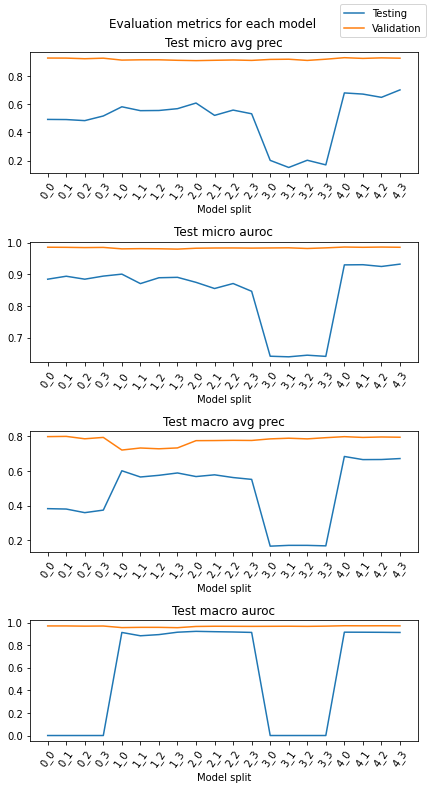

In [152]:
fig, ax = plt.subplots(4,1, figsize=(6, 11))

for i, col in enumerate(eval_df.columns):
    val_metrics = 'val_' + re.search('_(\w*)', col).group(1)
    ax[i].plot(eval_df[col], label='Testing')
    ax[i].plot(metrics_df[val_metrics], label='Validation')
    ax[i].tick_params(axis='x', rotation=55)
    ax[i].set(xlabel='Model split', title=col.replace('_', ' ').capitalize())
    
fig.suptitle('Evaluation metrics for each model')
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.tight_layout();



### 3.2.2 Predicted labels <a class="anchor" id="pred-labels"></a>

In `prepare_data.py` we used `labels = ['426783006', '426177001', '164934002', '427084000', '164890007', '39732003', '164889003', '59931005', '427393009', '270492004']` (in the same order than the table in the beginning of the notebook).

In [74]:
all_eval_dirs = ['../' + re.search(r'(\w+.\w+.\w+.)', path).group(1) for path, _ in eval_metrics]
all_eval_dirs = [dirs + 'predictions' for dirs in all_eval_dirs]

pred_files = []
# Loading all the csv files of predictions
for d in all_eval_dirs:
    temp_list = []
    dir_name = os.path.basename(os.path.abspath(d))

    # All files
    for file in os.listdir(d):
        if file.endswith('.csv'):
            temp_list.append(file)
            
    pred_files.append([d, temp_list])

In [75]:
def get_binary_predictions(path, files):
    predictions = []
    for i, file in enumerate(files):
        file_path = os.path.join(path, file)
        with open(file_path, 'rb') as opened_file:
            all_lines = opened_file.readlines()
            
            # Get the predictions in bytes and convert to string
            bytes_to_str = all_lines[2].decode("utf-8")
           
            # For clearity, let's get rid of the commas
            cleaned_line = bytes_to_str.strip().replace(',', '')
            
            predictions.append(cleaned_line)
    
    return predictions

all_binary_labels = []
for path, files in pred_files:
    temp_binaries = get_binary_predictions(path, files)
    # All the binary labels should be at the same size
    assert len({len(label) for label in temp_binaries}) == 1,'Different length of predicted labels in csvs? Check the predictions!'
    all_binary_labels.append([path, temp_binaries])

In [134]:
diagnoses = ['sinus rhythm', 'sinus bradycardia', 't wave abnormal', 
'sinus tachycardia', 'atrial flutter', 'left axis deviation', 
'atrial fibrillation', 't wave inversion', 'sinus arrhythmia', '1st degree av block']

train_test_split = {
    1: {    
        'train': ['G12EC', 'INCART', 'PTB_PTBXL', 'ChapmanShaoxing_Ningbo'],
        'test': 'CPSC_CPSC-Extra'
},
    2: {    
       'train': ['G12EC', 'INCART', 'PTB_PTBXL', 'CPSC_CPSC-Extra'],
        'test': 'ChapmanShaoxing_Ningbo'
},
    3: {    
       'train': ['G12EC', 'INCART', 'CPSC_CPSC-Extra', 'ChapmanShaoxing_Ningbo'],
        'test': 'PTB_PTBXL'
},
    4: {    
       'train': ['G12EC', 'PTB_PTBXL', 'CPSC_CPSC-Extra', 'ChapmanShaoxing_Ningbo'],
       'test': 'INCART'
},
    5: {    
       'train': ['INCART', 'PTB_PTBXL', 'CPSC_CPSC-Extra', 'ChapmanShaoxing_Ningbo'],
       'test': 'G12EC'
}}

# ------------------------------------------------

split_id = [1]*4 + [2]*4 + [3]*4 + [4]*4 + [5]*4
for i, (split, labels) in enumerate(all_binary_labels):

    print(color.RED+ color.UNDERLINE+ 'Model:', re.search(r'split\d_\d', split).group(0) +color.END)
    print()
    print(color.BOLD + color.PURPLE + 'training set:' + color.END, train_test_split[split_id[i]]['train'])
    print(color.BOLD + color.PURPLE + 'testing set:' + color.END, train_test_split[split_id[i]]['test'])
    print()
    
    
    all_preds = [name for name in os.listdir(split) if '.csv' in name]
    print('Total of {} predictions made'.format(len(all_preds)))
    
    # Check the number of different labels predicted
    set_binary_labels = set(labels)
    print('Total of {} different labels predicted'.format(len(set_binary_labels)))

    # Check if there are multilabel predictions
    multi_label = [label for label in labels if label.count('1') > 1]
    print('Total of {} ({:.2f} %) multilabeled predictions'.format(len(multi_label), (len(multi_label)/len(all_preds))*100))

    # Check the range of multilabeled predictions
    # Let's only find the maximum number of predicted labels
    if len(multi_label) > 0:
        max_lab = 0
        for label in multi_label:
            label_count = label.count('1')
            if label_count > max_lab:
                max_lab = label_count
        print('→ Number of predicted diagnoses varies from 1 to {}'.format(max_lab))
        
    print()
    
    # Let's count 10 most common labels predicted by each model
    # Count all labels
    all_pred_counter = Counter(labels)

    # Most common 10 labels and their count
    most_common_labels = all_pred_counter.most_common(10)
    
    print(color.BOLD + color.GREEN + 'Most common labels predicted and their counts:' + color.END)
    
    # Iterate over most common labels and get their count and predicted diagnoses
    for k, v  in most_common_labels:
            
        # for each label, find the predicted ones for clearity
        indexes = [i for i, x in enumerate(k) if x == '1']
        diagnoses_labeled = [diagnoses[i] for i in indexes]

        print(k, '-',  ', '.join(diagnoses_labeled), '-', v)
        
    print()
    print()

Model: split0_0

training set: ['G12EC', 'INCART', 'PTB_PTBXL', 'ChapmanShaoxing_Ningbo']
testing set: CPSC_CPSC-Extra

Total of 3546 predictions made
Total of 62 different labels predicted
Total of 818 (23.07 %) multilabeled predictions
→ Number of predicted diagnoses varies from 1 to 4

Most common labels predicted and their counts:
1000000000 - sinus rhythm - 1527
0000100000 - atrial flutter - 564
0001000000 - sinus tachycardia - 166
0010100000 - t wave abnormal, atrial flutter - 165
0000000001 - 1st degree av block - 126
1000000001 - sinus rhythm, 1st degree av block - 91
0000000000 -  - 79
0000001000 - atrial fibrillation - 79
0100000000 - sinus bradycardia - 76
0010000000 - t wave abnormal - 69


Model: split0_1

training set: ['G12EC', 'INCART', 'PTB_PTBXL', 'ChapmanShaoxing_Ningbo']
testing set: CPSC_CPSC-Extra

Total of 3546 predictions made
Total of 65 different labels predicted
Total of 883 (24.90 %) multilabeled predictions
→ Number of predicted diagnoses varies from 1 to 4

No multilabel predictions made from INCART database!

### Most common predicted labels within all models

In [135]:
all_labels_as_one_list = [labels for _, labels in all_binary_labels]
all_labels_as_one_list = [labels for split_labels in all_labels_as_one_list for labels in split_labels]
all_labels_as_one_set = set(all_labels_as_one_list)

print(f'Total of {len(all_labels_as_one_list)} individual labels from {len(all_labels_as_one_set)} different labels')
print()

all_counter = Counter(all_labels_as_one_list)
for k, v in all_counter.most_common(40):
    
    indexes = [i for i, x in enumerate(k) if x == '1']
    diagnoses_labeled = [diagnoses[i] for i in indexes]
    print(k, '- ' + color.RED + ', '.join(diagnoses_labeled) + color.END + ' -', v)

Total of 306336 individual labels from 161 different labels

1000000000 - sinus rhythm - 84412
0100000000 - sinus bradycardia - 56363
0000001000 - atrial fibrillation - 32923
0001000000 - sinus tachycardia - 29322
0000000000 -  - 13817
0010000000 - t wave abnormal - 9930
0000000001 - 1st degree av block - 8699
0000100000 - atrial flutter - 8439
0110000000 - sinus bradycardia, t wave abnormal - 5832
0000000010 - sinus arrhythmia - 5624
0000010000 - left axis deviation - 5030
0100000001 - sinus bradycardia, 1st degree av block - 4063
1010000000 - sinus rhythm, t wave abnormal - 3412
1000010000 - sinus rhythm, left axis deviation - 2998
1100000000 - sinus rhythm, sinus bradycardia - 2841
0011000000 - t wave abnormal, sinus tachycardia - 2448
0100010000 - sinus bradycardia, left axis deviation - 2362
0000011000 - left axis deviation, atrial fibrillation - 2294
0001010000 - sinus tachycardia, left axis deviation - 1798
1000000010 - sinus rhythm, sinus arrhythmia - 1791
1000000001 - sinus rh

### Only one predicted label and their counts

In [136]:
# Only one predicted label
for k, v in all_counter.most_common():
    if k.count('1') == 1:
        indexes = [i for i, x in enumerate(k) if x == '1']
        diagnoses_labeled = [diagnoses[i] for i in indexes]
        print(k, '- ' + color.RED + ', '.join(diagnoses_labeled) + color.END + ' -', v)

1000000000 - sinus rhythm - 84412
0100000000 - sinus bradycardia - 56363
0000001000 - atrial fibrillation - 32923
0001000000 - sinus tachycardia - 29322
0010000000 - t wave abnormal - 9930
0000000001 - 1st degree av block - 8699
0000100000 - atrial flutter - 8439
0000000010 - sinus arrhythmia - 5624
0000010000 - left axis deviation - 5030
0000000100 - t wave inversion - 132
